In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import networkx as nx
import seaborn as sns
import numpy as np

In [43]:
DATA_PATH = Path() / "../data"
#DATA_PATH = Path('/content/gdrive/My Drive/Colab Notebooks/VC_data_Cleaning_With_LLM/data')
DATA_PATH.mkdir(parents=True,exist_ok=True)

def load_csv(filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    return pd.read_csv(csv_path,encoding=encoding)

def save_csv(data, filename, data_path=DATA_PATH,encoding='ISO-8859-1'):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False,encoding='ISO-8859-1')

def load_excel(filename, data_path=DATA_PATH):
    csv_path = data_path / filename
    return pd.read_excel(csv_path)

PLOT_PATH = Path() / "../plot"
#PLOT_PATH = Path('/content/gdrive/My Drive/Colab Notebooks/VC_data_Cleaning_With_LLM/plot')
PLOT_PATH.mkdir(parents=True,exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300, transparent=True):
    path = PLOT_PATH / f"{fig_id}.{fig_extension}"
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, transparent=transparent)

RESULT_PATH = Path() / "../result"
#PLOT_PATH = Path('/content/gdrive/My Drive/Colab Notebooks/VC_data_Cleaning_With_LLM/plot')
RESULT_PATH.mkdir(parents=True,exist_ok=True)
def save_result(data, filename, data_path=RESULT_PATH):
    csv_path = data_path / filename
    data.to_csv(csv_path, index=False, encoding='utf-8-sig')

def save_excel(data, filename, data_path=RESULT_PATH):
    csv_path = data_path / filename
    data.to_excel(csv_path, index=False)


In [44]:
data = load_excel('final_dataset.xlsx')

### Reformat

In [45]:
data.columns

Index(['profileUrl', 'screenName_fo', 'userId_fo', 'name_fo', 'imgUrl_fo',
       'bio_fo', 'website_fo', 'location', 'location_cleansed', 'createdAt_fo',
       'followersCount_fo', 'friendsCount_fo', 'tweetsCount_fo',
       'certified_fo', 'following_fo', 'followedBy_fo', 'timestamp_fo',
       'row_id', 'if personal account', 'Position', 'Organization',
       'ai_related', 'Frequency', 'Include?', 'position_categorized',
       'highest_level_org', 'screenName_kol', 'userId_kol', 'name_kol',
       'imgUrl_kol', 'bio_kol', 'website_kol', 'location_kol', 'createdAt_kol',
       'followersCount_kol', 'friendsCount_kol', 'tweetsCount_kol',
       'certified_kol'],
      dtype='object')

In [98]:
KOL_list = data['name_kol'].drop_duplicates().reset_index(drop = True).to_list()
KOL_list

['Elon Musk',
 'Yann LeCun',
 'Andrej Karpathy',
 'Andrew Ng',
 'Mustafa Suleyman',
 'Ian Goodfellow',
 'Fei-Fei Li',
 'Demis Hassabis',
 'Sam Altman',
 'Kai-Fu Lee',
 'Russ Salakhutdinov',
 'Geoffrey Hinton',
 'Greg Brockman',
 'Daphne Koller',
 'Ilya Sutskever',
 nan]

In [55]:
data[data['name_kol'].isna()]

profileUrl screenName_fo  userId_fo name_fo imgUrl_fo bio_fo website_fo  \
3641        NaN           NaN        NaN     NaN       NaN    NaN        NaN   

     location location_cleansed createdAt_fo  ...  name_kol  imgUrl_kol  \
3641      NaN        Pittsburgh          NaN  ...       NaN         NaN   

      bio_kol  website_kol  location_kol  createdAt_kol followersCount_kol  \
3641      NaN          NaN           NaN            NaN                NaN   

      friendsCount_kol tweetsCount_kol certified_kol  
3641               NaN             NaN           NaN  

[1 rows x 38 columns]

In [64]:
data_cleaned = data.dropna(subset=['name_kol'])
len(data_cleaned)

3641

In [57]:
reformat_data = data_cleaned[['screenName_kol', 'userId_kol', 'name_kol',
       'imgUrl_kol', 'bio_kol', 'website_kol', 'location_kol', 'createdAt_kol',
       'followersCount_kol', 'friendsCount_kol', 'tweetsCount_kol',
       'screenName_fo', 'userId_fo', 'name_fo', 'imgUrl_fo',
       'bio_fo', 'website_fo', 'location', 'location_cleansed', 'createdAt_fo',
       'followersCount_fo', 'friendsCount_fo', 'tweetsCount_fo',
       'certified_fo', 'timestamp_fo', 'if personal account', 'Position', 'Organization',
       'ai_related', 'position_categorized', 'highest_level_org',
       'following_fo'
       # 'Frequency', 'Include?', 'row_id', 
       ]]

In [58]:
reformat_data.head()

screenName_kol  userId_kol         name_kol  \
0       elonmusk  44196397.0        Elon Musk   
1       elonmusk  44196397.0        Elon Musk   
2       elonmusk  44196397.0        Elon Musk   
3         ylecun  48008938.0       Yann LeCun   
4       karpathy  33836629.0  Andrej Karpathy   

                                          imgUrl_kol  \
0  https://pbs.twimg.com/profile_images/168332538...   
1  https://pbs.twimg.com/profile_images/168332538...   
2  https://pbs.twimg.com/profile_images/168332538...   
3  https://pbs.twimg.com/profile_images/148357786...   
4  https://pbs.twimg.com/profile_images/129666729...   

                                             bio_kol     website_kol  \
0                                                NaN             NaN   
1                                                NaN             NaN   
2                                                NaN             NaN   
3  Professor at NYU. Chief AI Scientist at Meta.\...  yann.lecun.com   
4  🧑‍🍳. Previously Director of AI @ Tesla, foundi...     karpathy.ai   

  location_kol                   createdAt_kol  followersCount_kol  \
0          NaN  Tue Jun 02 20:12:29 +0000 2009         180255265.0   
1          NaN  Tue Jun 02 20:12:29 +0000 2009         180255265.0   
2          NaN  Tue Jun 02 20:12:29 +0000 2009         180255265.0   
3     New York  Wed Jun 17 16:05:51 +0000 2009            701891.0   
4     Stanford  Tue Apr 21 06:49:15 +0000 2009            962447.0   

   friendsCount_kol  ...  tweetsCount_fo certified_fo  \
0             574.0  ...          3929.0          1.0   
1             574.0  ...         27269.0          0.0   
2             574.0  ...         10595.0          1.0   
3             713.0  ...         10639.0          0.0   
4             898.0  ...         10639.0          0.0   

               timestamp_fo if personal account    Position     Organization  \
0  2024-04-08T01:47:01.053Z                   N         NaN              NaN   
1  2024-04-08T01:47:00.079Z                   N         NaN              NaN   
2  2024-04-08T01:46:59.012Z                   N         NaN              NaN   
3  2024-04-08T01:52:48.750Z                   Y  researcher  Google DeepMind   
4  2024-04-08T02:08:28.525Z                   Y  researcher  Google DeepMind   

  ai_related    position_categorized highest_level_org following_fo  
0          N                     NaN               NaN          NaN  
1          N                     NaN               NaN          NaN  
2          N                     NaN               NaN          NaN  
3          Y  Researcher & Scientist            Google          NaN  
4          Y  Researcher & Scientist            Google          NaN  

[5 rows x 32 columns]

In [59]:
reformat_data['following_fo'].value_counts()

following_fo
1.0    153
Name: count, dtype: int64

In [60]:
reformat_data['following_fo'] = reformat_data['following_fo'].fillna(0)

/var/folders/wf/2r4hslkn0cv6g5b9rp14lh240000gn/T/ipykernel_40343/965732538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reformat_data['following_fo'] = reformat_data['following_fo'].fillna(0)


In [61]:
reformat_data['following_fo'].value_counts()

following_fo
0.0    3488
1.0     153
Name: count, dtype: int64

In [62]:
# reformat_data.head()

### EDA

#### followings point to influencer

Saving figure network_graph1


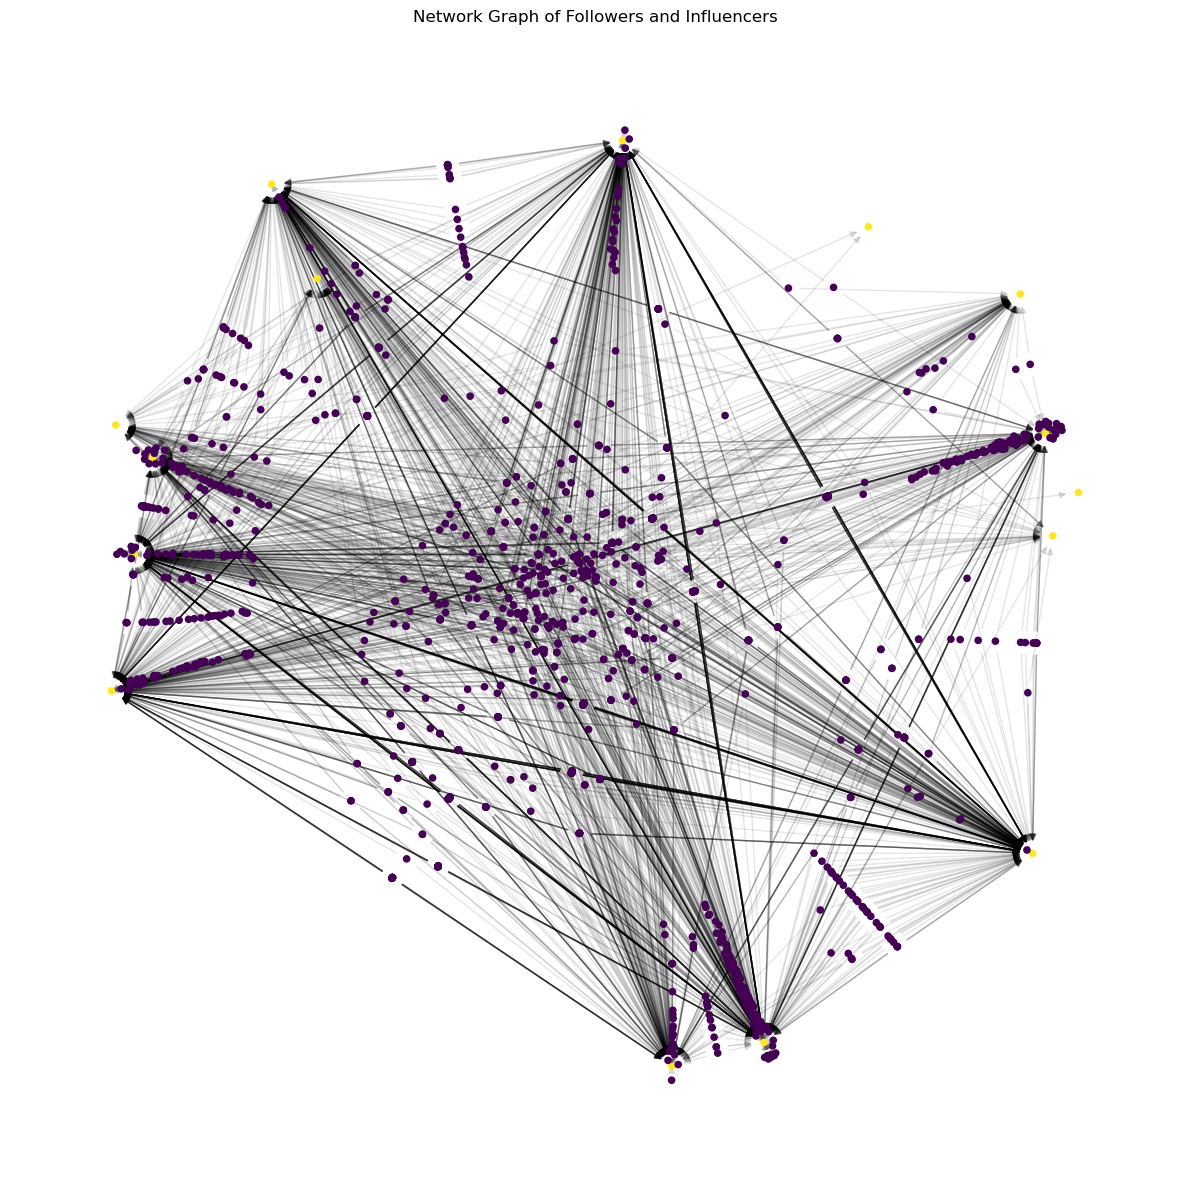

In [65]:
# Create a directed graph
G1 = nx.DiGraph()

# Adding nodes and edges from the dataset
# We use name_fo for follower nodes and screenName_kol for influencer nodes
for _, row in data_cleaned[['name_fo', 'screenName_kol']].dropna().iterrows():
    G1.add_node(row['name_fo'], type='follower')
    G1.add_node(row['screenName_kol'], type='influencer')
    G1.add_edge(row['name_fo'], row['screenName_kol'])

# Visualizing the network
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G1, seed=42)  # Positions for all nodes
nx.draw_networkx_nodes(G1, pos, node_size=20, node_color=[G1.nodes[n]['type'] == 'influencer' for n in G1])
nx.draw_networkx_edges(G1, pos, alpha=0.1)
plt.title('Network Graph of Followers and Influencers')
plt.axis('off')  # Turn off the axis
save_fig('network_graph1')
plt.show()

In [66]:
# Calculate network metrics
degree_centrality = nx.degree_centrality(G1)
in_degree_centrality = nx.in_degree_centrality(G1)
out_degree_centrality = nx.out_degree_centrality(G1)
betweenness_centrality = nx.betweenness_centrality(G1)
eigenvector_centrality = nx.eigenvector_centrality_numpy(G1)
clossness_centrality = nx.closeness_centrality(G1)

# Prepare the data for display
centrality_measures1 = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'In-Degree Centrality': in_degree_centrality,
    'Out-Degree Centrality': out_degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Eigenvector Centrality': eigenvector_centrality,
    'Closeness Centrality': clossness_centrality
})

In [67]:
# Display the top 20 nodes by in-degree centrality
top20_nodes_by_in_degree = centrality_measures1.sort_values(by='In-Degree Centrality', ascending=False).head(20)
top20_nodes_by_in_degree

Degree Centrality  \
drfeifei                                              0.371056   
AndrewYNg                                             0.310014   
karpathy                                              0.305213   
goodfellow_ian                                        0.285322   
sama                                                  0.277778   
ylecun                                                0.240055   
mustafasuleyman                                       0.193416   
elonmusk                                              0.172154   
kaifulee                                              0.160494   
rsalakhu                                              0.060357   
demishassabis                                         0.059671   
gdb                                                   0.031550   
geoffreyhinton                                        0.017833   
DaphneKoller                                          0.001372   
ilyasut                                               0.000686   
farhad manjoo (former bluecheck)                      0.001372   
Pat Gelsinger                                         0.001372   
Massachusetts Institute of Technology (MIT)           0.000686   
tabitha goldstaub                                     0.002743   
Boz                                                   0.001372   

                                             In-Degree Centrality  \
drfeifei                                                 0.371056   
AndrewYNg                                                0.310014   
karpathy                                                 0.305213   
goodfellow_ian                                           0.285322   
sama                                                     0.277778   
ylecun                                                   0.240055   
mustafasuleyman                                          0.193416   
elonmusk                                                 0.172154   
kaifulee                                                 0.160494   
rsalakhu                                                 0.060357   
demishassabis                                            0.059671   
gdb                                                      0.031550   
geoffreyhinton                                           0.017833   
DaphneKoller                                             0.001372   
ilyasut                                                  0.000686   
farhad manjoo (former bluecheck)                         0.000000   
Pat Gelsinger                                            0.000000   
Massachusetts Institute of Technology (MIT)              0.000000   
tabitha goldstaub                                        0.000000   
Boz                                                      0.000000   

                                             Out-Degree Centrality  \
drfeifei                                                  0.000000   
AndrewYNg                                                 0.000000   
karpathy                                                  0.000000   
goodfellow_ian                                            0.000000   
sama                                                      0.000000   
ylecun                                                    0.000000   
mustafasuleyman                                           0.000000   
elonmusk                                                  0.000000   
kaifulee                                                  0.000000   
rsalakhu                                                  0.000000   
demishassabis                                             0.000000   
gdb                                                       0.000000   
geoffreyhinton                                            0.000000   
DaphneKoller                                              0.000000   
ilyasut                                                   0.000000   
farhad manjoo (former bluecheck)                          0.001372   
Pat Gelsinger     

In [68]:
top50_nodes_by_in_degree = centrality_measures1.sort_values(by='In-Degree Centrality', ascending=False).head(50)
top50_nodes_by_in_degree

Degree Centrality  \
drfeifei                                              0.371056   
AndrewYNg                                             0.310014   
karpathy                                              0.305213   
goodfellow_ian                                        0.285322   
sama                                                  0.277778   
ylecun                                                0.240055   
mustafasuleyman                                       0.193416   
elonmusk                                              0.172154   
kaifulee                                              0.160494   
rsalakhu                                              0.060357   
demishassabis                                         0.059671   
gdb                                                   0.031550   
geoffreyhinton                                        0.017833   
DaphneKoller                                          0.001372   
ilyasut                                               0.000686   
farhad manjoo (former bluecheck)                      0.001372   
Pat Gelsinger                                         0.001372   
Massachusetts Institute of Technology (MIT)           0.000686   
tabitha goldstaub                                     0.002743   
Boz                                                   0.001372   
John Collison                                         0.001372   
Dave Morin                                            0.000686   
Rob Reiner                                            0.000686   
Netflix                                               0.000686   
dj patil                                              0.001372   
Neuralink                                             0.002058   
Ranjay Krishna                                        0.001372   
Neil Lawrence                                         0.003429   
Omid Kordestani                                       0.001372   
Frances Arnold                                        0.002058   
Clive Chan                                            0.001372   
@jason                                                0.001372   
Nat Friedman                                          0.003429   
David Marcus                                          0.002058   
Mike Maples, Jr                                       0.001372   
Wonder of Science                                     0.000686   
Kevin Roose                                           0.002058   
Shuran Song                                           0.001372   
Steven Johnson                                        0.000686   
Hanna Wallach (@hanna@sigmoid.social)                 0.001372   
Tracy Chou                                            0.001372   
European Commission                                   0.000686   
NATO                                                  0.000686   
Illia Ponomarenko                                     0.000686   
Javier Milei                                          0.000686   
Noah                                                  0.000686   
Adam Schiff                                           0.000686   
Aditya Grover                                         0.001372   
cdixon.eth                                            0.003429   
Will Marshall                                         0.001372   

                                             In-Degree Centrality  \
drfeifei                                                 0.371056   
AndrewYNg                                                0.310014   
karpathy                                                 0.305213   
goodfellow_ian                                           0.285322   
sama                                                     0.277778   
ylecun                                                   0.240055   
mustafasuleyman                                          0.193416   
elonmusk                                                 0.172154   
kaifulee                                                 

In-degree centrality measures the number of followers a user has. This is because each follower represents an incoming link (or edge) to the user (node).
A higher in-degree centrality indicates that a user is more popular or influential, as more people choose to follow them. This can signify a user's reach and ability to disseminate information widely through their tweets.
If analysis focuses on identifying influential users, gauging the popularity of users, or understanding how information might spread from influential nodes, in-degree centrality is the appropriate measure.

Degree centrality in an undirected network measures the total number of connections a node has, ignoring the direction of the connection.
For Twitter, if considering the network as undirected (combining followers and following into a single measure), degree centrality would indicate how active a user is in terms of their overall social engagement on Twitter.
If the focus is more on general activity or engagement levels (both following and being followed) without distinguishing the type of engagement, you might consider using degree centrality. However, typically, Twitter networks are better analyzed as directed networks due to the clear distinction between followers and following.

Out-degree indicates how active a node is in terms of its interactions or communications with other nodes. For instance, on Twitter, a user's out-degree centrality would measure how many other users they follow. High out-degree centrality might suggest that a node has the potential to spread information or resources widely across the network, assuming that its connections are receptive. Understanding nodes with high out-degree centrality can be crucial for analyzing the dynamics of influence, information dissemination, and even control within a network.

In [69]:
centrality_measures1['In-Degree Centrality'].describe()

count    1459.000000
mean        0.001705
std         0.020955
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.371056
Name: In-Degree Centrality, dtype: float64

Saving figure influencers_network


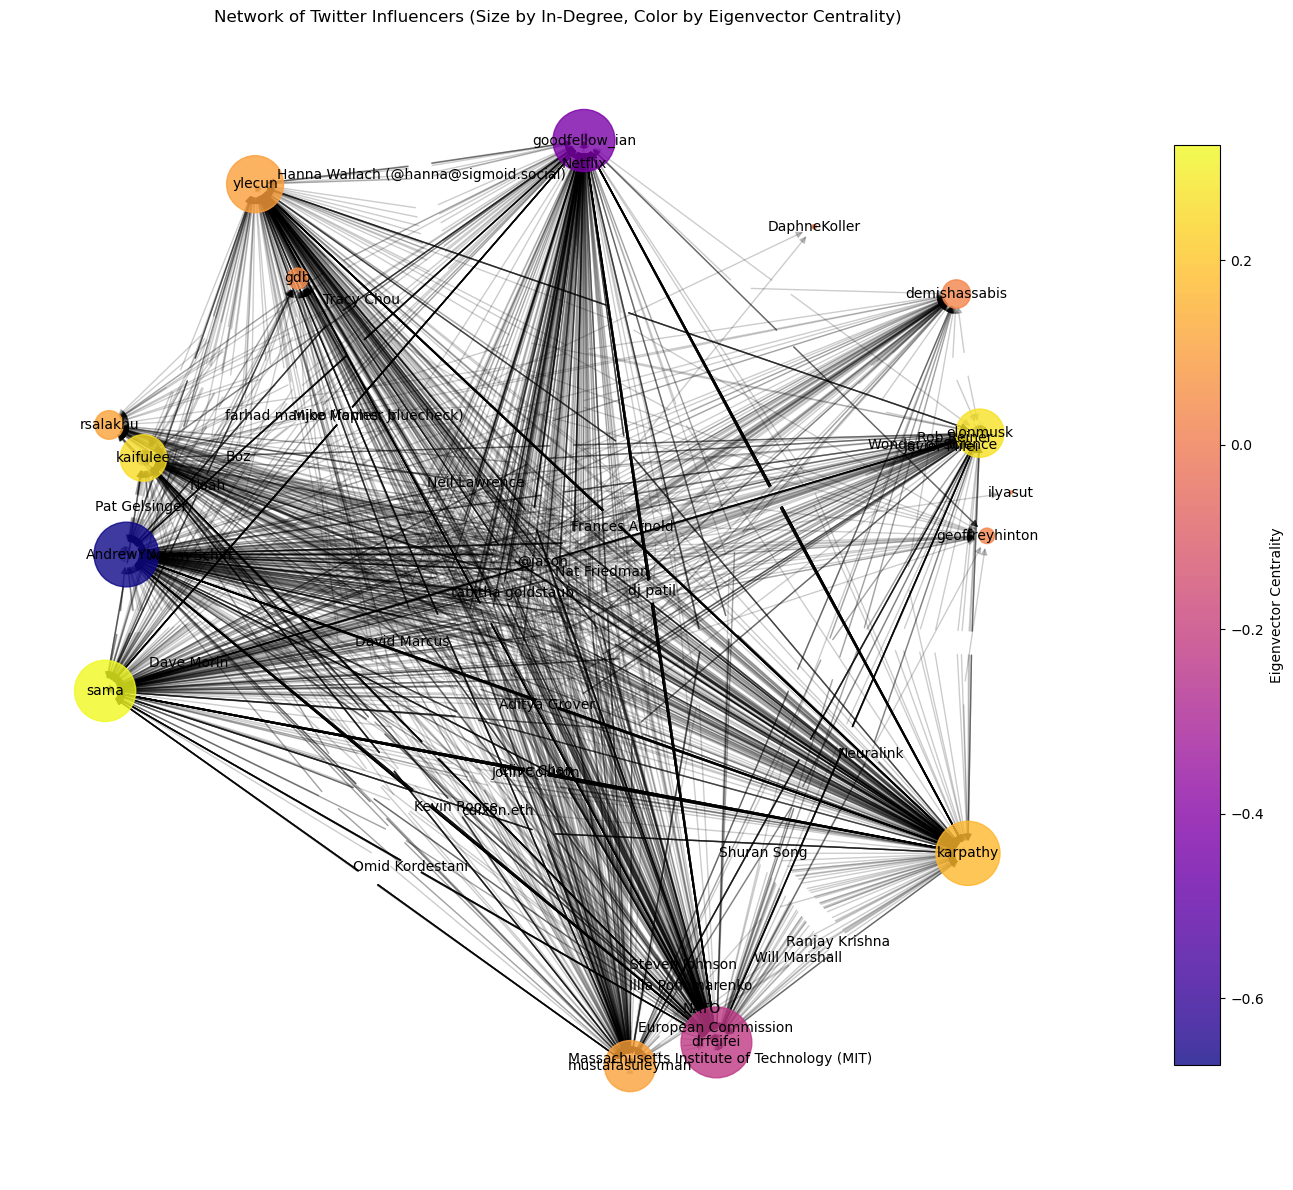

In [70]:
# Set up the graph visualization
fig, ax = plt.subplots(figsize=(14, 12))
pos = nx.spring_layout(G1, seed=42)  # positions for all nodes

# Nodes
node_sizes = [in_degree_centrality[n] * 7000 for n in G1]  # Scale in-degree centrality for visibility
node_colors = [eigenvector_centrality[n] for n in G1]  # Color by eigenvector centrality

# Draw the nodes
nodes = nx.draw_networkx_nodes(G1, pos, node_size=node_sizes, node_color=node_colors, 
                               cmap=plt.cm.plasma, alpha=0.8, ax=ax)

# Draw the edges
nx.draw_networkx_edges(G1, pos, alpha=0.2, ax=ax)

# Draw labels for top 20 by in-degree centrality
top_labels = {n: n for n in top50_nodes_by_in_degree.index}
nx.draw_networkx_labels(G1, pos, labels=top_labels, font_size=10, font_color='black', ax=ax)

# Colorbar for eigenvector centrality
plt.colorbar(nodes, label='Eigenvector Centrality', shrink=0.8)

ax.set_title('Network of Twitter Influencers (Size by In-Degree, Color by Eigenvector Centrality)')
plt.axis('off')  # Hide axes
save_fig('influencers_network')
plt.show()

In [71]:
top_labels

{'drfeifei': 'drfeifei',
 'AndrewYNg': 'AndrewYNg',
 'karpathy': 'karpathy',
 'goodfellow_ian': 'goodfellow_ian',
 'sama': 'sama',
 'ylecun': 'ylecun',
 'mustafasuleyman': 'mustafasuleyman',
 'elonmusk': 'elonmusk',
 'kaifulee': 'kaifulee',
 'rsalakhu': 'rsalakhu',
 'demishassabis': 'demishassabis',
 'gdb': 'gdb',
 'geoffreyhinton': 'geoffreyhinton',
 'DaphneKoller': 'DaphneKoller',
 'ilyasut': 'ilyasut',
 'farhad manjoo (former bluecheck)': 'farhad manjoo (former bluecheck)',
 'Pat Gelsinger': 'Pat Gelsinger',
 'Massachusetts Institute of Technology (MIT)': 'Massachusetts Institute of Technology (MIT)',
 'tabitha goldstaub': 'tabitha goldstaub',
 'Boz': 'Boz',
 'John Collison': 'John Collison',
 'Dave Morin': 'Dave Morin',
 'Rob Reiner': 'Rob Reiner',
 'Netflix': 'Netflix',
 'dj patil': 'dj patil',
 'Neuralink': 'Neuralink',
 'Ranjay Krishna': 'Ranjay Krishna',
 'Neil Lawrence': 'Neil Lawrence',
 'Omid Kordestani': 'Omid Kordestani',
 'Frances Arnold': 'Frances Arnold',
 'Clive Chan':

In [72]:
top50_data = data[data['name_fo'].isin(top_labels.keys())][[
    'screenName_fo', 'name_fo', 'location', 'followersCount_fo', 'friendsCount_fo', 'tweetsCount_fo', 'ai_related', 'if personal account',
    'position_categorized', 'highest_level_org'
]].drop_duplicates('name_fo').set_index('screenName_fo')
top50_data

name_fo  \
screenName_fo                                                  
wonderofscience                            Wonder of Science   
MIT              Massachusetts Institute of Technology (MIT)   
tabithagold                                tabitha goldstaub   
lawrennd                                       Neil Lawrence   
francesarnold                                 Frances Arnold   
davidmarcus                                     David Marcus   
fmanjoo                     farhad manjoo (former bluecheck)   
Jason                                                 @jason   
itsclivetime                                      Clive Chan   
omidkordestani                               Omid Kordestani   
RanjayKrishna                                 Ranjay Krishna   
neuralink                                          Neuralink   
PGelsinger                                     Pat Gelsinger   
dpatil                                              dj patil   
netflix                                              Netflix   
robreiner                                         Rob Reiner   
davemorin                                         Dave Morin   
collision                                      John Collison   
boztank                                                  Boz   
m2jr                                         Mike Maples, Jr   
natfriedman                                     Nat Friedman   
kevinroose                                       Kevin Roose   
SongShuran                                       Shuran Song   
Will4Planet                                    Will Marshall   
cdixon                                            cdixon.eth   
adityagrover_                                  Aditya Grover   
RepAdamSchiff                                    Adam Schiff   
noaheverett                                             Noah   
JMilei                                          Javier Milei   
IAPonomarenko                             Illia Ponomarenko    
NATO                                                    NATO   
EU_Commission                            European Commission   
triketora                                        Tracy Chou    
hannawallach           Hanna Wallach (@hanna@sigmoid.social)   
stevenbjohnson                                Steven Johnson   

                                      location  followersCount_fo  \
screenName_fo                                                       
wonderofscience                           üöÄ          2447566.0   
MIT                              Cambridge, MA          1335435.0   
tabithagold                Cambridge, England             16126.0   
lawrennd                             Cambridge            36570.0   
francesarnold                          Caltech            65179.0   
davidmarcus                    California, USA           123332.0   
fmanjoo                        California, USA           186703.0   
Jason                          California, USA           819438.0   
itsclivetime                   California, USA             5634.0   
omidkordestani                 California, USA            38139.0   
RanjayKrishna                  California, USA             4904.0   
neuralink                      California, USA          1378817.0   
PGelsinger                     California, USA            81750.0   
dpatil                         California, USA            82281.0   
netflix                        California, USA         22653084.0   
robreiner                      California, USA          2341348.0   
davemorin                 California / Montana           389572.0   
collision                 California / Ireland           173884.0   
boztank                             California           109188.0   
m2jr                                California            83005.0   
natfriedman                         California           180270.0   
kevinroose                          California           171094.0   
SongShuran                  

Saving figure position_distribution


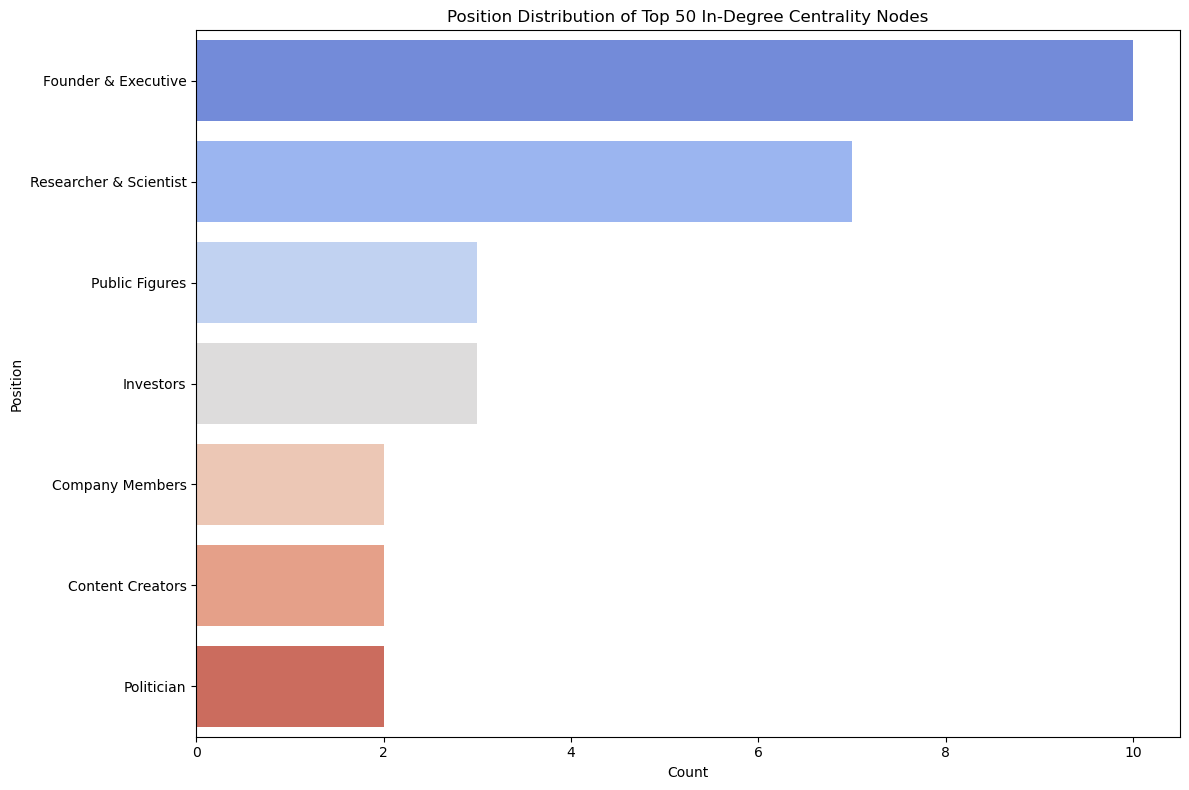

In [73]:
import seaborn as sns

# Analyze the geographical distribution using the 'location_cleansed' column
position_cat = top50_data['position_categorized'].value_counts()  # Top 50 positions

# Plotting the geographic distribution
plt.figure(figsize=(12, 8))
sns.barplot(x=position_cat.values, y=position_cat.index, palette='coolwarm')
plt.title('Position Distribution of Top 50 In-Degree Centrality Nodes')
plt.xlabel('Count')
plt.ylabel('Position')
save_fig('position_distribution')
plt.show()

#### influencer point to followings - Random Layout

Saving figure network_graph2


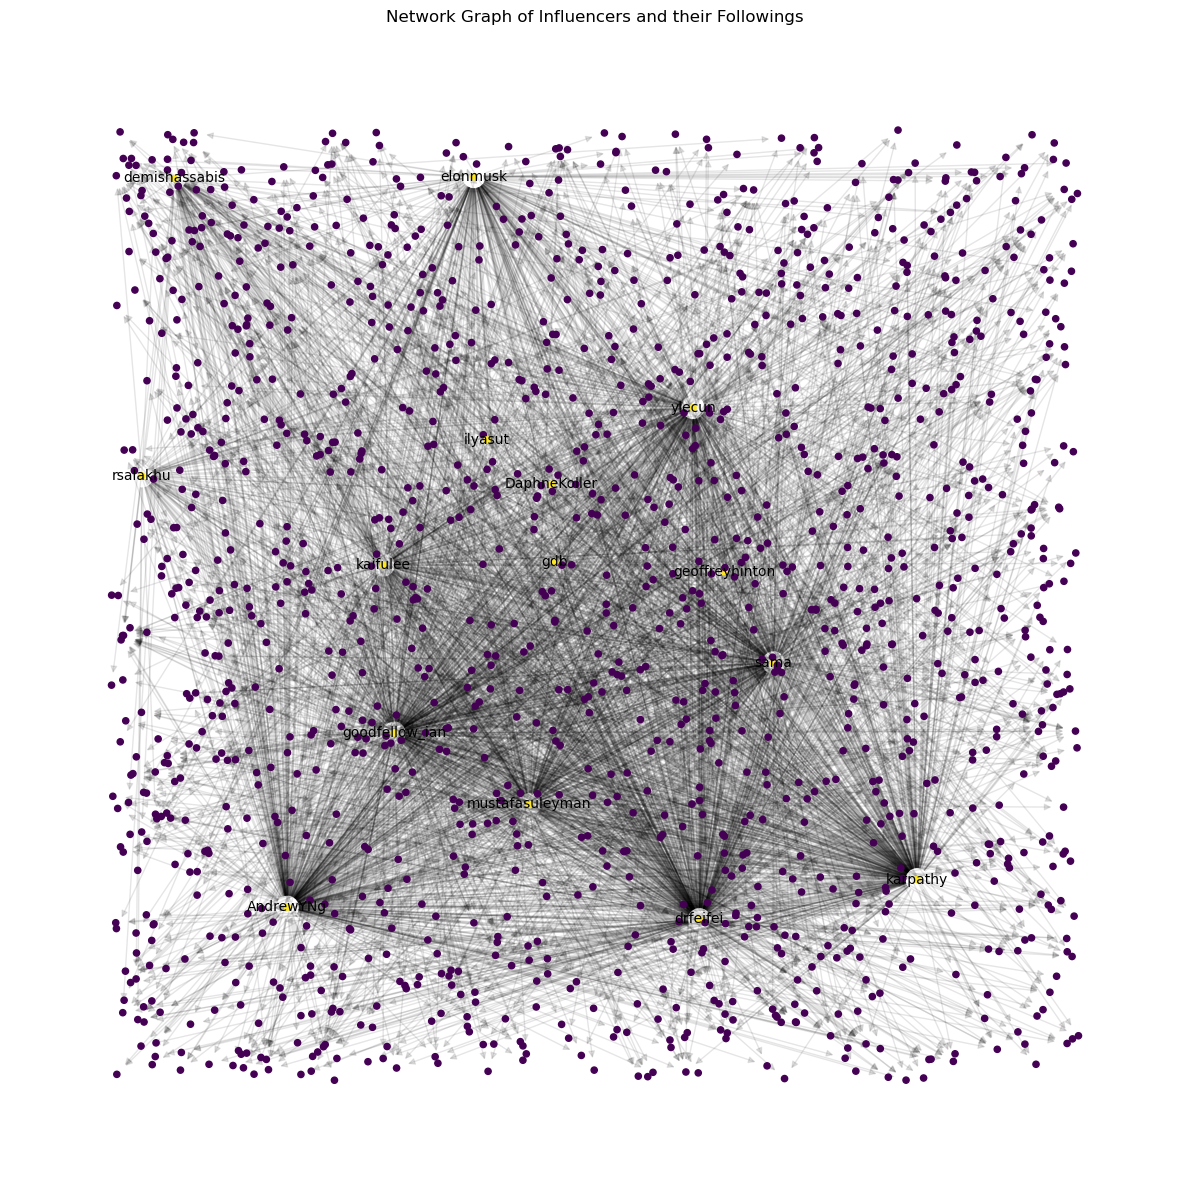

In [74]:
# Create a directed graph
G2 = nx.DiGraph()

# Add edges to the graph
for index, row in reformat_data.iterrows():
    G2.add_node(row['screenName_kol'], type='influencer')
    G2.add_node(row['name_fo'], type='following')
    G2.add_edge(row['screenName_kol'], row['name_fo'], follow_back=row['following_fo'])

# Define edge styles: solid for follow-back, dashed for not
edge_styles = {1: 'solid', 0: 'dashed'}
for u, v, d in G2.edges(data=True):
    G2[u][v]['style'] = edge_styles[d['follow_back']]

# Visualizing the network
plt.figure(figsize=(12, 12))
pos_random = nx.random_layout(G2, seed=42)  # Positions for all nodes

nx.draw_networkx_nodes(G2, pos_random, node_size=20, node_color=[G2.nodes[n]['type'] == 'influencer' for n in G2])
nx.draw_networkx_edges(G2, pos_random, alpha=0.1)
kol_labels = {node: node for node, data in G2.nodes(data=True) if data['type'] == 'influencer'}
nx.draw_networkx_labels(G2, pos_random, labels=kol_labels, font_size=10, font_color='black')

plt.title('Network Graph of Influencers and their Followings')
plt.axis('off')  # Turn off the axis
save_fig('network_graph2')
plt.show()



Nodes are placed randomly in the drawing area. This can be useful for large networks to get a quick sense of the randomness or density.

In [75]:
# The 10 nodes away from central

# Calculate the centroid of the graph
centroid1 = np.mean(list(pos_random.values()), axis=0)

# Calculate the Euclidean distance of each node from the centroid
distances1 = {node: np.linalg.norm(np.array(position) - centroid1) for node, position in pos_random.items()}

# Sort nodes by distance from centroid in descending order
sorted_nodes1 = sorted(distances1, key=distances1.get, reverse=True)

# Select top 10 furthest nodes
furthest_nodes1 = sorted_nodes1[:10]

print("The 10 nodes furthest from the central cluster are:", furthest_nodes1)

The 10 nodes furthest from the central cluster are: ['Antoine Bosselut', 'Henrique Ponde', 'Jon Favreau', 'qilu', 'Stephen King', 'TensorFlow', 'Scuderia Ferrari', 'The Royal Society', 'Dr. Jill Biden', 'New York Times Books']


In [76]:
top10_furthest1 = data[data['name_fo'].isin(furthest_nodes1)].drop_duplicates('name_fo')
top10_furthest1

profileUrl    screenName_fo     userId_fo  \
580              https://twitter.com/qilu             qilu  1.691788e+07   
1483     https://twitter.com/nytimesbooks     nytimesbooks  1.434251e+06   
1701       https://twitter.com/TensorFlow       TensorFlow  2.541070e+08   
1816  https://twitter.com/ScuderiaFerrari  ScuderiaFerrari  1.082477e+08   
1858          https://twitter.com/jonfavs          jonfavs  1.304960e+08   
1908     https://twitter.com/royalsociety     royalsociety  2.856781e+07   
2764        https://twitter.com/ABosselut        ABosselut  1.249433e+09   
2906    https://twitter.com/HenriquePonde    HenriquePonde  4.274780e+08   
3294          https://twitter.com/DrBiden          DrBiden  8.217845e+17   
3367      https://twitter.com/StephenKing      StephenKing  2.233154e+09   

                   name_fo                                          imgUrl_fo  \
580                   qilu  https://pbs.twimg.com/profile_images/206145978...   
1483  New York Times Books  https://pbs.twimg.com/profile_images/976855357...   
1701            TensorFlow  https://pbs.twimg.com/profile_images/110333957...   
1816      Scuderia Ferrari  https://pbs.twimg.com/profile_images/947659786...   
1858           Jon Favreau  https://pbs.twimg.com/profile_images/168026926...   
1908     The Royal Society  https://pbs.twimg.com/profile_images/114778841...   
2764      Antoine Bosselut  https://pbs.twimg.com/profile_images/146351746...   
2906        Henrique Ponde  https://pbs.twimg.com/profile_images/235877364...   
3294        Dr. Jill Biden  https://pbs.twimg.com/profile_images/133414685...   
3367          Stephen King  https://pbs.twimg.com/profile_images/378800000...   

                                                 bio_fo  \
580   passionate about working on things that enable...   
1483  This account is no longer active. Follow @nyti...   
1701  TensorFlow is a fast, flexible, and scalable o...   
1816  The official home of the Tifosi.   16x Constru...   
1858  The other one. @PodSaveAmerica, @CrookedMedia,...   
1908  The Royal Society is a Fellowship of the world...   
2764  Helping machines make sense of the world. Asst...   
2906                        @OpenAI engineer/researcher   
3294  Lifelong educator. Military mother. Grandmothe...   
3367                                             Author   

                       website_fo           location  location_cleansed  \
580                           NaN            Seattle            Seattle   
1483            nytimes.com/books       New York, NY           New York   
1701               tensorflow.org  Mountain View, CA      Mountain View   
1816                ferrarif1.com  Maranello - Italy  Maranello - Italy   
1858           offlinewithjon.com    Los Angeles, CA        Los Angeles   
1908  royalsociety.org/whats-new/         London, UK             London   
2764        atcbosselut.github.io                NaN                NaN   
2906                          NaN                NaN                NaN   
3294                 joebiden.com                NaN                NaN   
3367              stephenking.com                NaN                NaN   

                        createdAt_fo  ...          name_kol  \
580   Thu Oct 23 02:15:04 +0000 2008  ...        Sam Altman   
1483  Sun Mar 18 19:14:57 +0000 2007  ...        Fei-Fei Li   
1701  Fri Feb 18 16:21:31 +0000 2011  ...    Ian Goodfellow   
1816  Mon Jan 25 09:43:14 +0000 2010  ...         Elon Musk   
1858  Wed Apr 07 13:10:43 +0000 2010  ...  Mustafa Suleyman   
1908  Fri Apr 03 14:00:38 +0000 2009  ...         Elon Musk   
2764  Thu Mar 07 16:03:18 +0000 2013  ...        Yann LeCun   
2906  Sat Dec 03 15:40:51 +0000 2011  ...        Sam Altman   
3294  Wed Jan 18 18:21:02 +0000 2017  ...    Ian Goodfellow   
3367  Fri Dec 06 15:26:35 +0000 2013  ...         Elon Musk   

                                             imgUrl_kol  \
580   https://pbs.twimg.com/profile_images/804990434...   
1483  https://

In [77]:
top10_furthest1.describe()

userId_fo  followersCount_fo  friendsCount_fo  tweetsCount_fo  \
count  1.000000e+01       1.000000e+01         10.00000        10.00000   
mean   8.217845e+16       2.345850e+06        456.90000     21640.20000   
std    2.598711e+17       2.728696e+06        541.51997     28974.65818   
min    1.434251e+06       1.359000e+03         26.00000        38.00000   
25%    4.848777e+07       9.192575e+04        113.25000       968.75000   
50%    1.923015e+08       8.869100e+05        161.50000      5686.50000   
75%    1.043945e+09       4.674300e+06        615.50000     40012.00000   
max    8.217845e+17       7.114843e+06       1712.00000     73886.00000   

       certified_fo  following_fo  followedBy_fo       row_id  Frequency  \
count     10.000000           0.0            0.0    10.000000  10.000000   
mean       0.600000           NaN            NaN  2404.000000   1.700000   
std        0.516398           NaN            NaN  2825.029518   0.674949   
min        0.000000           NaN            NaN   231.000000   1.000000   
25%        0.000000           NaN            NaN   304.000000   1.000000   
50%        1.000000           NaN            NaN  1062.500000   2.000000   
75%        1.000000           NaN            NaN  4892.250000   2.000000   
max        1.000000           NaN            NaN  6957.000000   3.000000   

         userId_kol  followersCount_kol  friendsCount_kol  tweetsCount_kol  \
count  1.000000e+01        1.000000e+01         10.000000        10.000000   
mean   1.550898e+17        5.482961e+07        803.700000     16715.600000   
std    3.269580e+17        8.655755e+07        236.971658     18057.322991   
min    1.605000e+03        1.271860e+05        537.000000      1934.000000   
25%    4.419640e+07        3.360898e+05        574.000000      2740.000000   
50%    4.610267e+07        1.764333e+06        803.000000      6336.000000   
75%    1.768519e+09        1.358981e+08       1026.500000     36130.500000   
max    7.754491e+17        1.802553e+08       1104.000000     41915.000000   

       certified_kol  
count           10.0  
mean             1.0  
std              0.0  
min              1.0  
25%              1.0  
50%              1.0  
75%              1.0  
max              1.0

In [78]:
top10_furthest1[['name_fo', 'location', 'followersCount_fo', 'friendsCount_fo', 'tweetsCount_fo', 'bio_fo', 'ai_related', 'if personal account', 'position_categorized', 'highest_level_org']]

name_fo           location  followersCount_fo  \
580                   qilu            Seattle             4581.0   
1483  New York Times Books       New York, NY          5544924.0   
1701            TensorFlow  Mountain View, CA           376837.0   
1816      Scuderia Ferrari  Maranello - Italy          5017759.0   
1858           Jon Favreau    Los Angeles, CA          1396983.0   
1908     The Royal Society         London, UK           353960.0   
2764      Antoine Bosselut                NaN             3331.0   
2906        Henrique Ponde                NaN             1359.0   
3294        Dr. Jill Biden                NaN          3643925.0   
3367          Stephen King                NaN          7114843.0   

      friendsCount_fo  tweetsCount_fo  \
580             620.0            38.0   
1483            162.0         64286.0   
1701            117.0          2697.0   
1816             75.0         73886.0   
1858           1712.0         16894.0   
1908            982.0         47718.0   
2764            602.0           986.0   
2906            112.0           258.0   
3294             26.0           963.0   
3367            161.0          8676.0   

                                                 bio_fo ai_related  \
580   passionate about working on things that enable...          N   
1483  This account is no longer active. Follow @nyti...          N   
1701  TensorFlow is a fast, flexible, and scalable o...          Y   
1816  The official home of the Tifosi.   16x Constru...          N   
1858  The other one. @PodSaveAmerica, @CrookedMedia,...          N   
1908  The Royal Society is a Fellowship of the world...          N   
2764  Helping machines make sense of the world. Asst...          Y   
2906                        @OpenAI engineer/researcher          Y   
3294  Lifelong educator. Military mother. Grandmothe...          N   
3367                                             Author          N   

     if personal account    position_categorized highest_level_org  
580                    Y  Researcher & Scientist         Microsoft  
1483                   N                     NaN               NaN  
1701                   N                     NaN               NaN  
1816                   N                     NaN               NaN  
1858                   Y          Public Figures     Crooked Media  
1908                   N                     NaN               NaN  
2764                   Y  Researcher & Scientist            ICepfl  
2906                   Y  Researcher & Scientist            OpenAI  
3294                   Y          Public Figures               NaN  
3367                   Y          Public Figures               NaN

Top 10 furthest in random layout: 10 non-KOLs, 3 AI-related, 4 organization account, 3 positions related to Tech, the other position is public figures. 

#### influencer point to followings - Spectral Layout

Saving figure network_graph3


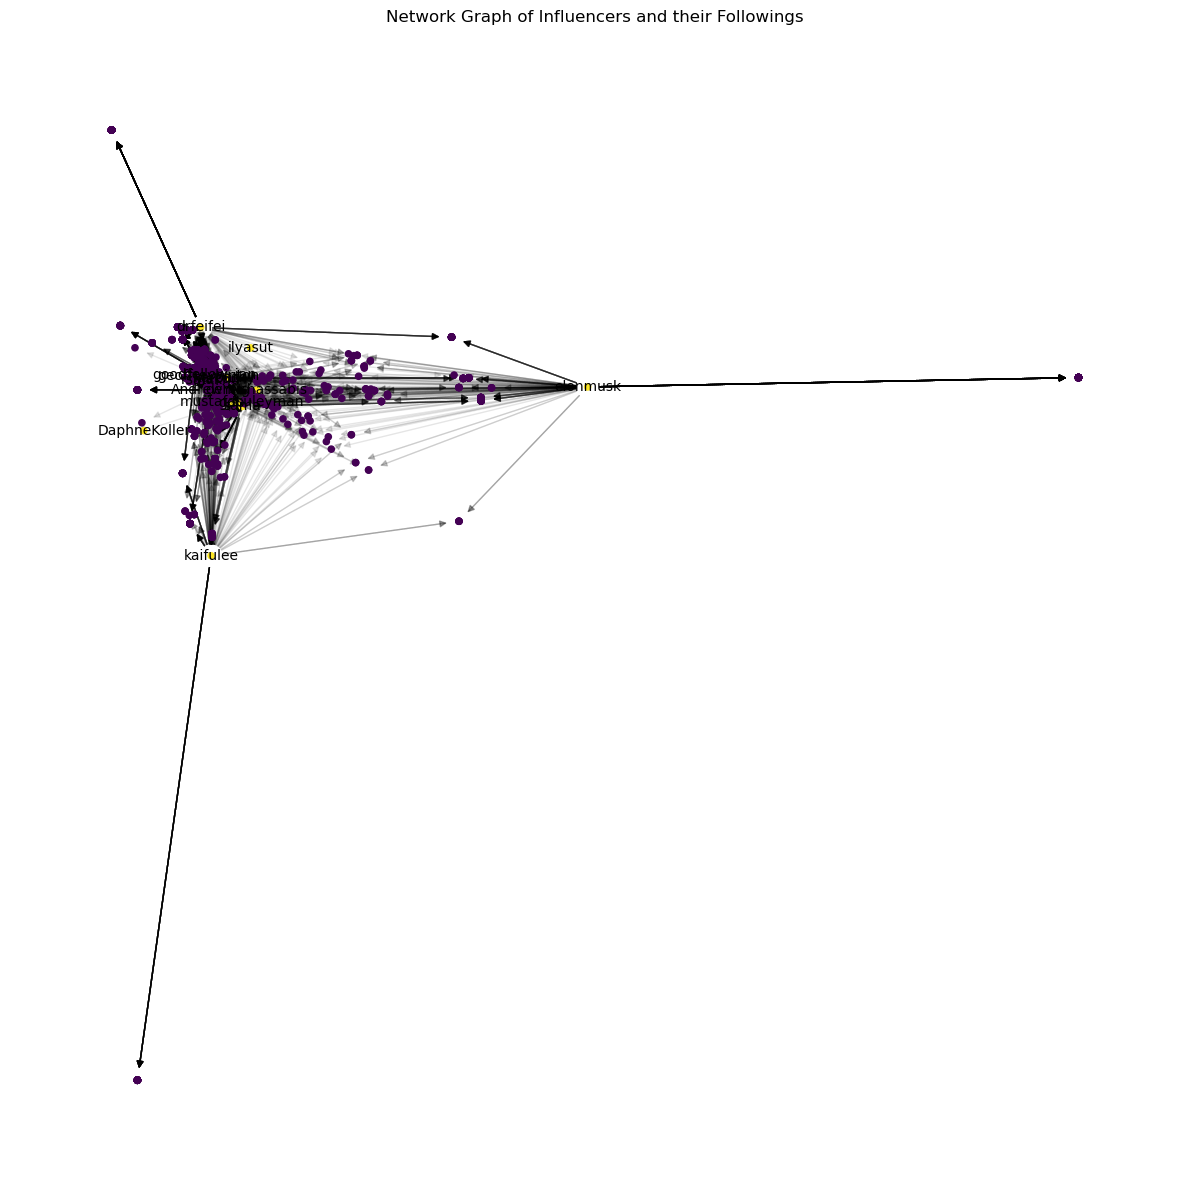

In [79]:
# Create a directed graph
G2_2 = nx.DiGraph()

# Add edges to the graph
for index, row in reformat_data.iterrows():
    G2_2.add_node(row['screenName_kol'], type='influencer')
    G2_2.add_node(row['name_fo'], type='following')
    G2_2.add_edge(row['screenName_kol'], row['name_fo'], follow_back=row['following_fo'])

# Define edge styles: solid for follow-back, dashed for not
edge_styles = {1: 'solid', 0: 'dashed'}
for u, v, d in G2_2.edges(data=True):
    G2_2[u][v]['style'] = edge_styles[d['follow_back']]

# Visualizing the network
plt.figure(figsize=(12, 12))
pos_spectral = nx.spectral_layout(G2_2)  # Positions for all nodes

nx.draw_networkx_nodes(G2_2, pos_spectral, node_size=20, node_color=[G2_2.nodes[n]['type'] == 'influencer' for n in G2_2])
nx.draw_networkx_edges(G2_2, pos_spectral, alpha=0.1)
kol_labels = {node: node for node, data in G2_2.nodes(data=True) if data['type'] == 'influencer'}
nx.draw_networkx_labels(G2_2, pos_spectral, labels=kol_labels, font_size=10, font_color='black')

plt.title('Network Graph of Influencers and their Followings')
plt.axis('off')  # Turn off the axis
save_fig('network_graph3')
plt.show()



Uses the eigenvalues and eigenvectors of the graph Laplacian. The spectral layout is particularly good at illustrating clusters or communities within networks.

In [80]:
# The 10 nodes away from central

# Calculate the centroid of the graph
centroid2 = np.mean(list(pos_spectral.values()), axis=0)

# Calculate the Euclidean distance of each node from the centroid
distances2 = {node: np.linalg.norm(np.array(position) - centroid2) for node, position in pos_spectral.items()}

# Sort nodes by distance from centroid in descending order
sorted_nodes2 = sorted(distances2, key=distances2.get, reverse=True)

# Select top 10 furthest nodes
furthest_nodes2 = sorted_nodes2[:10]

print("The 10 nodes furthest from the central cluster are:", furthest_nodes2)

The 10 nodes furthest from the central cluster are: ['Tom Hulme', 'Mitt Romney', 'erin griffith', 'Bloomberg Originals', 'Michelle Malkin', 'Sinovation Ventures', 'Hua Chunying ', 'Oprah Winfrey', 'Eamonn Carey', 'Steven Cohen']


In [81]:
top10_furthest2 = data[data['name_fo'].isin(furthest_nodes2)].drop_duplicates('name_fo')
top10_furthest2

profileUrl    screenName_fo     userId_fo  \
123    https://twitter.com/michellemalkin   michellemalkin  1.597670e+07   
803      https://twitter.com/eringriffith     eringriffith  1.626171e+07   
1960      https://twitter.com/eamonncarey      eamonncarey  1.408438e+07   
2030           https://twitter.com/thulme           thulme  7.224702e+06   
2158       https://twitter.com/MittRomney       MittRomney  5.005570e+07   
2173    https://twitter.com/StevenACohen2    StevenACohen2  8.200659e+17   
2336     https://twitter.com/sinovationvc     sinovationvc  7.751951e+17   
2722  https://twitter.com/SpokespersonCHN  SpokespersonCHN  1.183698e+18   
3169     https://twitter.com/bbgoriginals     bbgoriginals  2.527511e+08   
3191            https://twitter.com/Oprah            Oprah  1.939778e+07   

                  name_fo                                          imgUrl_fo  \
123       Michelle Malkin  https://pbs.twimg.com/profile_images/134863635...   
803         erin griffith  https://pbs.twimg.com/profile_images/139526135...   
1960         Eamonn Carey  https://pbs.twimg.com/profile_images/114507768...   
2030            Tom Hulme  https://pbs.twimg.com/profile_images/162151961...   
2158          Mitt Romney  https://pbs.twimg.com/profile_images/964489716...   
2173         Steven Cohen  https://pbs.twimg.com/profile_images/132237281...   
2336  Sinovation Ventures  https://pbs.twimg.com/profile_images/775196576...   
2722        Hua Chunying   https://pbs.twimg.com/profile_images/122784133...   
3169  Bloomberg Originals  https://pbs.twimg.com/profile_images/169916040...   
3191        Oprah Winfrey  https://pbs.twimg.com/profile_images/112335936...   

                                                 bio_fo  \
123                             Nothing beside remains.   
803   New York Times writer covering start-ups and v...   
1960  Recovering founder. Early investor in 100+ com...   
2030  Managing Partner @GVTeam (Google Ventures) whe...   
2158  Husband, Father, Grandfather, Former Governor,...   
2173  Husband of tiaalexnymets on Instagram. Founder...   
2336  Sinovation Ventures is a deep tech venture cap...   
2722  Assistant Minister of Foreign Affairs\nForeign...   
3169  Bloomberg Originals offers cinematic documenta...   
3191                                                NaN   

                    website_fo                     location location_cleansed  \
123                        NaN                          USA               USA   
803          erin.substack.com            San Francisco, CA     San Francisco   
1960     thestartuplexicon.com              London, England            London   
2030                thulme.com                       London            London   
2158  facebook.com/mittromney/                 Holladay, UT          Holladay   
2173              üóΩ‚öæ.y.at                Greenwich, CT         Greenwich   
2336    sinovationventures.com                        China             China   
2722                       NaN  ‰∏≠ÂõΩÔºåÂåó‰∫¨ Beijing PRC           Beijing   
3169   bloomberg.com/originals                          NaN               NaN   
3191                 oprah.com                          NaN               NaN   

                        createdAt_fo  ...    name_kol  \
123   Mon Aug 25 02:52:07 +0000 2008  ...  Kai-Fu Lee   
803   Fri Sep 12 19:10:31 +0000 2008  ...  Kai-Fu Lee   
1960  Wed Mar 05 18:32:37 +0000 2008  ...  Kai-Fu Lee   
2030  Tue Jul 03 08:54:51 +0000 2007  ...  Kai-Fu Lee   
2158  Tue Jun 23 18:24:04 +0000 2009  ...  Kai-Fu Lee   
2173  Sat Jan 14 00:32:02 +0000 2017  ...  Kai-Fu Lee   
2336  Mon Sep 12 04:51:21 +0000 2016  ...  Kai-Fu Lee   
2722  Mon Oct 14 10:56:54 +0000 2019  ...  Kai-Fu Lee   
3169  Tue Feb 15 20:50:58 +0000 2011  ...  Kai-Fu Lee   
3191  Fri Jan 23 15:18:34 +0000 2009  ...  Kai-Fu Lee   

                                             imgUrl_kol  \
123   https://pbs.twimg.com/profile_images/101643813...   
803   https://pbs.twimg.c

In [82]:
top10_furthest2.describe()

userId_fo  followersCount_fo  friendsCount_fo  tweetsCount_fo  \
count  1.000000e+01       1.000000e+01        10.000000       10.000000   
mean   2.778959e+17       4.985069e+06      2796.800000    43406.100000   
std    4.597482e+17       1.296150e+07      5226.153117    81794.461383   
min    7.224702e+06       4.662000e+03       139.000000      740.000000   
25%    1.604795e+07       4.417950e+04       299.250000     3740.000000   
50%    3.472674e+07       7.683845e+05       853.500000    12871.000000   
75%    5.813963e+17       1.996410e+06      1503.250000    25771.500000   
max    1.183698e+18       4.177328e+07     17001.000000   266695.000000   

       certified_fo  following_fo  followedBy_fo       row_id  Frequency  \
count     10.000000           0.0            0.0    10.000000       10.0   
mean       0.800000           NaN            NaN  2195.700000        1.0   
std        0.421637           NaN            NaN  2156.653583        0.0   
min        0.000000           NaN            NaN    57.000000        1.0   
25%        1.000000           NaN            NaN   565.000000        1.0   
50%        1.000000           NaN            NaN  1219.500000        1.0   
75%        1.000000           NaN            NaN  3500.750000        1.0   
max        1.000000           NaN            NaN  6011.000000        1.0   

       userId_kol  followersCount_kol  friendsCount_kol  tweetsCount_kol  \
count        10.0                10.0              10.0             10.0   
mean   50940456.0           1469626.0             658.0           3743.0   
std           0.0                 0.0               0.0              0.0   
min    50940456.0           1469626.0             658.0           3743.0   
25%    50940456.0           1469626.0             658.0           3743.0   
50%    50940456.0           1469626.0             658.0           3743.0   
75%    50940456.0           1469626.0             658.0           3743.0   
max    50940456.0           1469626.0             658.0           3743.0   

       certified_kol  
count           10.0  
mean             1.0  
std              0.0  
min              1.0  
25%              1.0  
50%              1.0  
75%              1.0  
max              1.0

In [83]:
top10_furthest2[['name_fo', 'location', 'followersCount_fo', 'friendsCount_fo', 'tweetsCount_fo', 'bio_fo', 'ai_related', 'if personal account', 'position_categorized', 'highest_level_org']]

name_fo                     location  followersCount_fo  \
123       Michelle Malkin                          USA          2001880.0   
803         erin griffith            San Francisco, CA            76707.0   
1960         Eamonn Carey              London, England             9209.0   
2030            Tom Hulme                       London            33337.0   
2158          Mitt Romney                 Holladay, UT          1979998.0   
2173         Steven Cohen                Greenwich, CT           287821.0   
2336  Sinovation Ventures                        China             4662.0   
2722        Hua Chunying   ‰∏≠ÂõΩÔºåÂåó‰∫¨ Beijing PRC          2434849.0   
3169  Bloomberg Originals                          NaN          1248948.0   
3191        Oprah Winfrey                          NaN         41773283.0   

      friendsCount_fo  tweetsCount_fo  \
123           17001.0         79079.0   
803            1405.0         26426.0   
1960           5355.0         23808.0   
2030           1230.0          8375.0   
2158            295.0          2195.0   
2173            477.0           740.0   
2336            139.0          1001.0   
2722            218.0         12096.0   
3169           1536.0        266695.0   
3191            312.0         13646.0   

                                                 bio_fo ai_related  \
123                             Nothing beside remains.          N   
803   New York Times writer covering start-ups and v...        NaN   
1960  Recovering founder. Early investor in 100+ com...          N   
2030  Managing Partner @GVTeam (Google Ventures) whe...          N   
2158  Husband, Father, Grandfather, Former Governor,...          N   
2173  Husband of tiaalexnymets on Instagram. Founder...        NaN   
2336  Sinovation Ventures is a deep tech venture cap...        NaN   
2722  Assistant Minister of Foreign Affairs\nForeign...          N   
3169  Bloomberg Originals offers cinematic documenta...          N   
3191                                                NaN          N   

     if personal account position_categorized       highest_level_org  
123                    Y       Public Figures           Conservatives  
803                    Y            Investors      The New York Times  
1960                   Y            Investors            TeraVentures  
2030                   Y            Investors         Google Ventures  
2158                   Y           Politician              Government  
2173                   Y            Investors        Point72 Ventures  
2336                   Y            Investors     Sinovation Ventures  
2722                   N                  NaN                     NaN  
3169                   N                  NaN                     NaN  
3191                   Y       Public Figures  The Oprah Winfrey Show

Top 10 furthest in spectral layout: 10 non-KOLs, None AI related, 4 corporate accounts, positions includes investors, public figures and company members, not related to tech.

### Centrality Metrics

In [84]:
# Calculate network metrics
degree_centrality = nx.degree_centrality(G2)
in_degree_centrality = nx.in_degree_centrality(G2)
out_degree_centrality = nx.out_degree_centrality(G2)
betweenness_centrality = nx.betweenness_centrality(G2)
eigenvector_centrality = nx.eigenvector_centrality(G2)
clossness_centrality = nx.closeness_centrality(G2)

# Prepare the data for display
centrality_measures = pd.DataFrame({
    'Degree Centrality': degree_centrality,
    'In-Degree Centrality': in_degree_centrality,
    'Out-Degree Centrality': out_degree_centrality,
    'Betweenness Centrality': betweenness_centrality,
    'Eigenvector Centrality': eigenvector_centrality,
    'Closeness Centrality': clossness_centrality
})


In [85]:
# Display the top 50 nodes by in-degree centrality
top50_nodes_by_in_degree = centrality_measures.sort_values(by='In-Degree Centrality', ascending=False).head(50)
top50_nodes_by_in_degree

Degree Centrality  In-Degree Centrality  \
Ilya Sutskever                0.008910              0.008910   
OpenAI                        0.008225              0.008225   
Jeff Dean (@)                 0.008225              0.008225   
Paul Graham                   0.007539              0.007539   
Oriol Vinyals                 0.006854              0.006854   
Andrej Karpathy               0.006854              0.006854   
Yann LeCun                    0.006854              0.006854   
Geoffrey Hinton               0.006854              0.006854   
Bill Gates                    0.006854              0.006854   
Demis Hassabis                0.006854              0.006854   
Sam Altman                    0.006854              0.006854   
Vinod Khosla                  0.006854              0.006854   
Shivon Zilis                  0.006854              0.006854   
Jack Clark                    0.006169              0.006169   
John Carmack                  0.006169              0.006169   
Andrew Ng                     0.006169              0.006169   
Elon Musk                     0.006169              0.006169   
Sundar Pichai                 0.006169              0.006169   
Reid Hoffman                  0.005483              0.005483   
Richard Socher                0.005483              0.005483   
Fei-Fei Li                    0.005483              0.005483   
Nando de Freitas              0.005483              0.005483   
Eric Topol                    0.005483              0.005483   
Christian Szegedy             0.005483              0.005483   
Hugo Larochelle               0.005483              0.005483   
Satya Nadella                 0.005483              0.005483   
Eric Schmidt                  0.005483              0.005483   
Marc Andreessen               0.005483              0.005483   
Google AI                     0.005483              0.005483   
Barack Obama                  0.005483              0.005483   
Pieter Abbeel                 0.005483              0.005483   
Greg Brockman                 0.005483              0.005483   
Tim Cook                      0.005483              0.005483   
Patrick Collison              0.004798              0.004798   
Mustafa Suleyman              0.004798              0.004798   
Quoc Le                       0.004798              0.004798   
Russ Salakhutdinov            0.004798              0.004798   
jack                          0.004798              0.004798   
Fernando Pereira              0.004798              0.004798   
Eric Horvitz                  0.004798              0.004798   
Ian Goodfellow                0.004798              0.004798   
Erik Brynjolfsson             0.004798              0.004798   
Kyunghyun Cho                 0.004798              0.004798   
Jim Fan                       0.004798              0.004798   
Lex Fridman                   0.004798              0.004798   
Chris Anderson                0.004798              0.004798   
Franois Chollet               0.004798              0.004798   
Alec Radford                  0.004798              0.004798   
Oren Etzioni                  0.004798              0.004798   
Christopher Manning           0.004798              0.004798   

                     Out-Degree Centrality  Betweenness Centrality  \
Ilya Sutskever                         0.0                     0.0   
OpenAI                                 0.0                     0.0   
Jeff Dean (@)                          0.0                     0.0   
Paul Graham                            0.0                     0.0   
Oriol Vinyals                          0.0                     0.0   
Andrej Karpathy                        0.0                     0.0   
Yann LeCun                             0.0                     0.0   
Geoffrey Hinton                        0.0                     0.0   
Bill Gates                             0.0                     0.0   
Demis Hassabis                         0.0              

Saving figure influencers_network


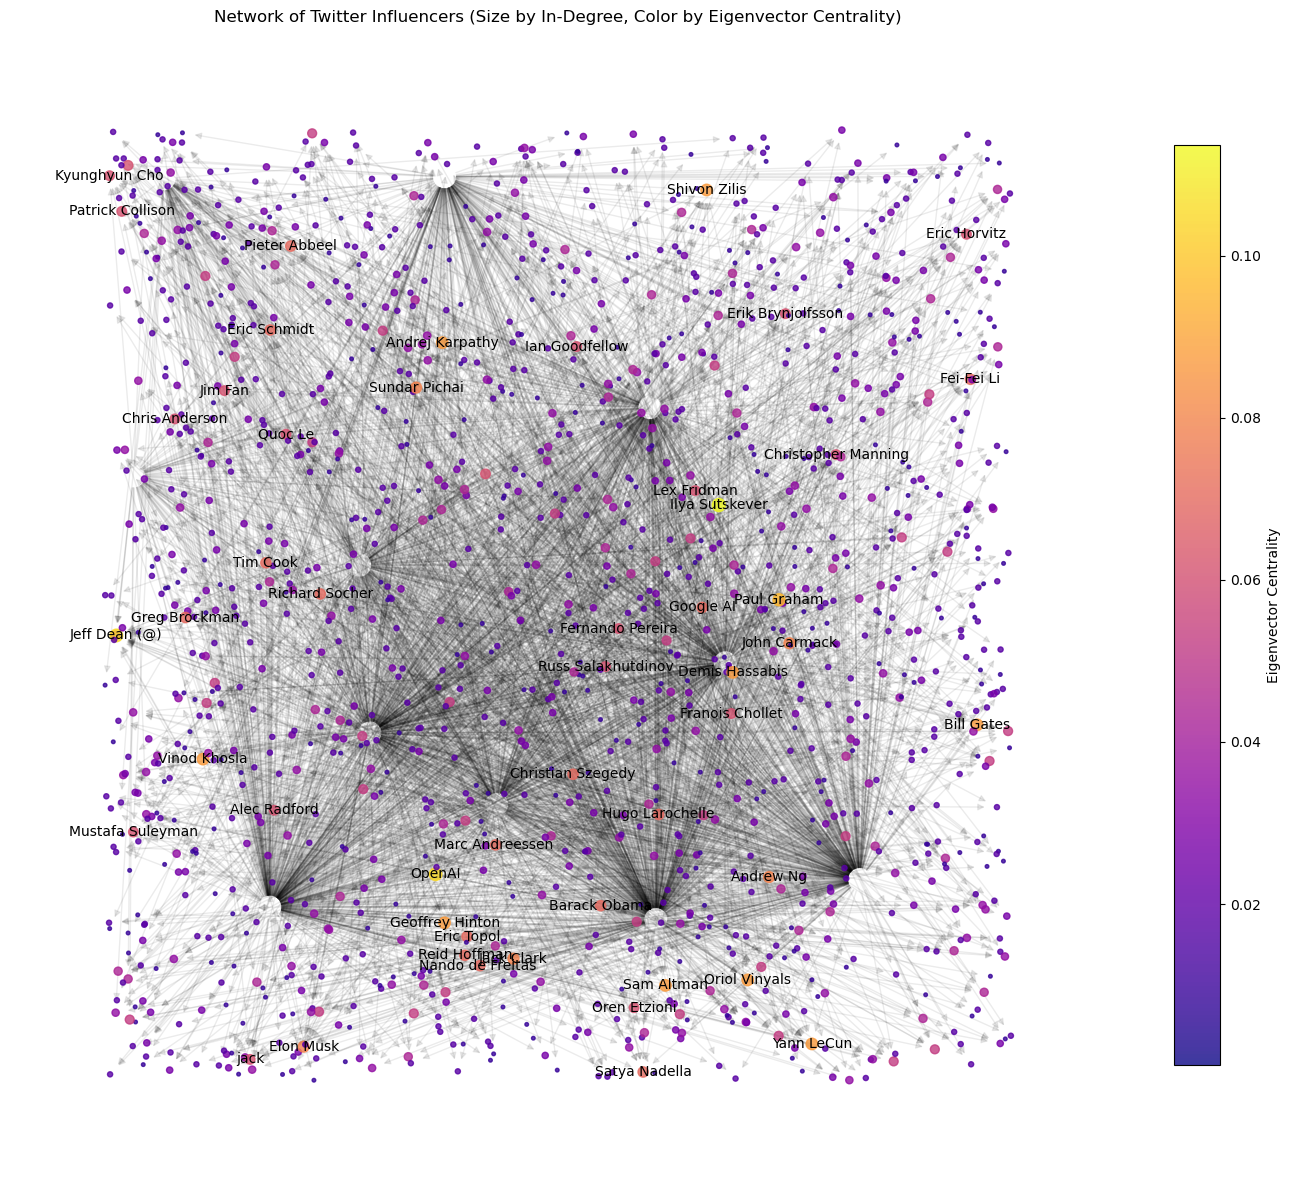

In [90]:
# Set up the graph visualization
fig, ax = plt.subplots(figsize=(14, 12))
pos = nx.random_layout(G2, seed=42)  # positions for all nodes

# Nodes
node_sizes = [in_degree_centrality[n] * 10000 for n in G2]  # Scale in-degree centrality for visibility
node_colors = [eigenvector_centrality[n] for n in G2]  # Color by eigenvector centrality

# Draw the nodes
nodes = nx.draw_networkx_nodes(G2, pos, node_size=node_sizes, node_color=node_colors, 
                               cmap=plt.cm.plasma, alpha=0.8, ax=ax)

# Draw the edges
nx.draw_networkx_edges(G2, pos, alpha=0.08, ax=ax)

# Draw labels for top 50 by in-degree centrality
top_labels = {n: n for n in top50_nodes_by_in_degree.index}
nx.draw_networkx_labels(G2, pos, labels=top_labels, font_size=10, font_color='black', ax=ax)

# Colorbar for eigenvector centrality
plt.colorbar(nodes, label='Eigenvector Centrality', shrink=0.8)

ax.set_title('Network of Twitter Influencers (Size by In-Degree, Color by Eigenvector Centrality)')
plt.axis('off')  # Hide axes
save_fig('influencers_network')
plt.show()


10/15 influencer in top 50.

Eigenvector centrality is a measure of the influence of a node within a network. It assigns relative scores to all nodes in the network based on the concept that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes. 

Influential Connections: The node is likely connected to other nodes that are themselves influential or have high eigenvector centralities. In simpler terms, this node is followed by KOLs who are also followed by many other KOLs.
Indirect Influence: Even if the node doesn't have a very high degree centrality (i.e., it's not followed by a large number of KOLs), its high eigenvector centrality suggests that its followers are significant influencers within the network. This can mean that the node has indirect influence through its powerful connections.

Potential for Information Spread: A node with high eigenvector centrality is well-positioned to spread information effectively through the network, as its tweets or messages are likely to be seen and shared by other influential users.

Strategic Importance: From a marketing or information campaign perspective, such a node might be very valuable despite not being a KOL itself. Engaging with this user could lead to higher visibility among KOLs and their followings due to the user's influential network position.

Community Hub: The node might serve as a hub within a community of KOLs. This could indicate that the user is a thought leader in a niche area or subject that is of particular interest to KOLs.

In summary, a high eigenvector centrality in this dataset would indicate that the node is not just popular in terms of the number of KOLs following it, but also in terms of the quality of those connections in the network. Such nodes might be central in the flow of information and could have a substantial impact on the network despite possibly not being KOLs themselves.

In [91]:
top_labels

{'Ilya Sutskever': 'Ilya Sutskever',
 'OpenAI': 'OpenAI',
 'Jeff Dean (@)': 'Jeff Dean (@)',
 'Paul Graham': 'Paul Graham',
 'Oriol Vinyals': 'Oriol Vinyals',
 'Andrej Karpathy': 'Andrej Karpathy',
 'Yann LeCun': 'Yann LeCun',
 'Geoffrey Hinton': 'Geoffrey Hinton',
 'Bill Gates': 'Bill Gates',
 'Demis Hassabis': 'Demis Hassabis',
 'Sam Altman': 'Sam Altman',
 'Vinod Khosla': 'Vinod Khosla',
 'Shivon Zilis': 'Shivon Zilis',
 'Jack Clark': 'Jack Clark',
 'John Carmack': 'John Carmack',
 'Andrew Ng': 'Andrew Ng',
 'Elon Musk': 'Elon Musk',
 'Sundar Pichai': 'Sundar Pichai',
 'Reid Hoffman': 'Reid Hoffman',
 'Richard Socher': 'Richard Socher',
 'Fei-Fei Li': 'Fei-Fei Li',
 'Nando de Freitas ': 'Nando de Freitas ',
 'Eric Topol': 'Eric Topol',
 'Christian Szegedy': 'Christian Szegedy',
 'Hugo Larochelle': 'Hugo Larochelle',
 'Satya Nadella': 'Satya Nadella',
 'Eric Schmidt': 'Eric Schmidt',
 'Marc Andreessen ': 'Marc Andreessen ',
 'Google AI': 'Google AI',
 'Barack Obama': 'Barack Obama',


In [99]:
top_labels_nonKOL = {name: value for name, value in top_labels.items() if name not in KOL_list}

In [100]:
top_labels_nonKOL
# count = 37

{'OpenAI': 'OpenAI',
 'Jeff Dean (@)': 'Jeff Dean (@)',
 'Paul Graham': 'Paul Graham',
 'Oriol Vinyals': 'Oriol Vinyals',
 'Bill Gates': 'Bill Gates',
 'Vinod Khosla': 'Vinod Khosla',
 'Shivon Zilis': 'Shivon Zilis',
 'Jack Clark': 'Jack Clark',
 'John Carmack': 'John Carmack',
 'Sundar Pichai': 'Sundar Pichai',
 'Reid Hoffman': 'Reid Hoffman',
 'Richard Socher': 'Richard Socher',
 'Nando de Freitas ': 'Nando de Freitas ',
 'Eric Topol': 'Eric Topol',
 'Christian Szegedy': 'Christian Szegedy',
 'Hugo Larochelle': 'Hugo Larochelle',
 'Satya Nadella': 'Satya Nadella',
 'Eric Schmidt': 'Eric Schmidt',
 'Marc Andreessen ': 'Marc Andreessen ',
 'Google AI': 'Google AI',
 'Barack Obama': 'Barack Obama',
 'Pieter Abbeel': 'Pieter Abbeel',
 'Tim Cook': 'Tim Cook',
 'Patrick Collison': 'Patrick Collison',
 'Quoc Le': 'Quoc Le',
 'jack': 'jack',
 'Fernando Pereira': 'Fernando Pereira',
 'Eric Horvitz': 'Eric Horvitz',
 'Erik Brynjolfsson': 'Erik Brynjolfsson',
 'Kyunghyun Cho': 'Kyunghyun Cho',


In [108]:
top50_data_nonKOL = data_cleaned[data_cleaned['name_fo'].isin(top_labels_nonKOL.keys())][[
    'screenName_fo', 'name_fo', 'location', 'location_cleansed', 'followersCount_fo', 'friendsCount_fo', 'tweetsCount_fo', 'ai_related', 'if personal account',
    'position_categorized', 'highest_level_org'
]].drop_duplicates('name_fo').set_index('screenName_fo')
top50_data_nonKOL

name_fo            location location_cleansed  \
screenName_fo                                                                
BarackObama             Barack Obama      Washington, DC        Washington   
fchollet             Franois Chollet       United States               USA   
ChrSzegedy         Christian Szegedy       Sunnyvale, CA         Sunnyvale   
erikbryn           Erik Brynjolfsson            Stanford          Stanford   
BillGates                 Bill Gates         Seattle, WA           Seattle   
erichorvitz             Eric Horvitz     Seattle WA  USA           Seattle   
etzioni                 Oren Etzioni             Seattle           Seattle   
jackclarkSF               Jack Clark   San Francisco, CA     San Francisco   
AlecRad                 Alec Radford   San Francisco, CA     San Francisco   
patrickc            Patrick Collison  patrick@stripe.com               NaN   
earnmyturns         Fernando Pereira  Palo Alto, CA, USA         Palo Alto   
shivon                  Shivon Zilis       Palo Alto, CA         Palo Alto   
chrmanning       Christopher Manning           Palo Alto         Palo Alto   
chr1sa                Chris Anderson              Orinda            Orinda   
reidhoffman             Reid Hoffman   new world of work          New York   
ericschmidt             Eric Schmidt   Mountain View, CA     Mountain View   
GoogleAI                   Google AI   Mountain View, CA     Mountain View   
quocleix                     Quoc Le   Mountain View, CA     Mountain View   
pmarca              Marc Andreessen       Menlo Park, CA        Menlo Park   
kchonyc                Kyunghyun Cho       Manhattan, NY         Manhattan   
NandoDF            Nando de Freitas      London, England            London   
OriolVinyalsML         Oriol Vinyals     London, England            London   
EricTopol                 Eric Topol        La Jolla, CA          La Jolla   
ID_AA_Carmack           John Carmack          Dallas, TX            Dallas   
tim_cook                    Tim Cook           Cupertino         Cupertino   
DrJimFan                     Jim Fan         Contact ‚Üí               NaN   
pabbeel                Pieter Abbeel        Berkeley, CA          Berkeley   
lexfridman               Lex Fridman   Austin and Boston           Austin    
JeffDean               Jeff Dean (@)                 NaN               NaN   
RichardSocher         Richard Socher                 NaN               NaN   
paulg                    Paul Graham                 NaN               NaN   
hugo_larochelle      Hugo Larochelle                 NaN               NaN   
vkhosla                 Vinod Khosla                 NaN               NaN   
satyanadella           Satya Nadella                 NaN               NaN   
sundarpichai           Sundar Pichai                 NaN               NaN   
OpenAI                        OpenAI                 NaN               NaN   
jack                            jack                 NaN               NaN   

                 followersCount_fo  friendsCount_fo  tweetsCount_fo  \
screenName_fo                                                         
BarackObama            131913049.0         543248.0         17013.0   
fchollet                  466714.0            766.0         22368.0   
ChrSzegedy                 31878.0           2109.0          6985.0   
erikbryn                  208650.0           4408.0         26608.0   
BillGates               64520390.0            586.0          4458.0   
erichorvitz                28496.0           1585.0          2520.0   
etzioni                    27543.0           1636.0          8150.0   
jackclarkSF                67173.0           4674.0         31551.0   
AlecRad                    42713.0            317.0           560.0   
patrickc                  455022.0             31.0          9324.0   
earnmyturns                18561.0            230.0          3124.0   
shivon                    122959.0           1701.0          33

Saving figure position_distribution


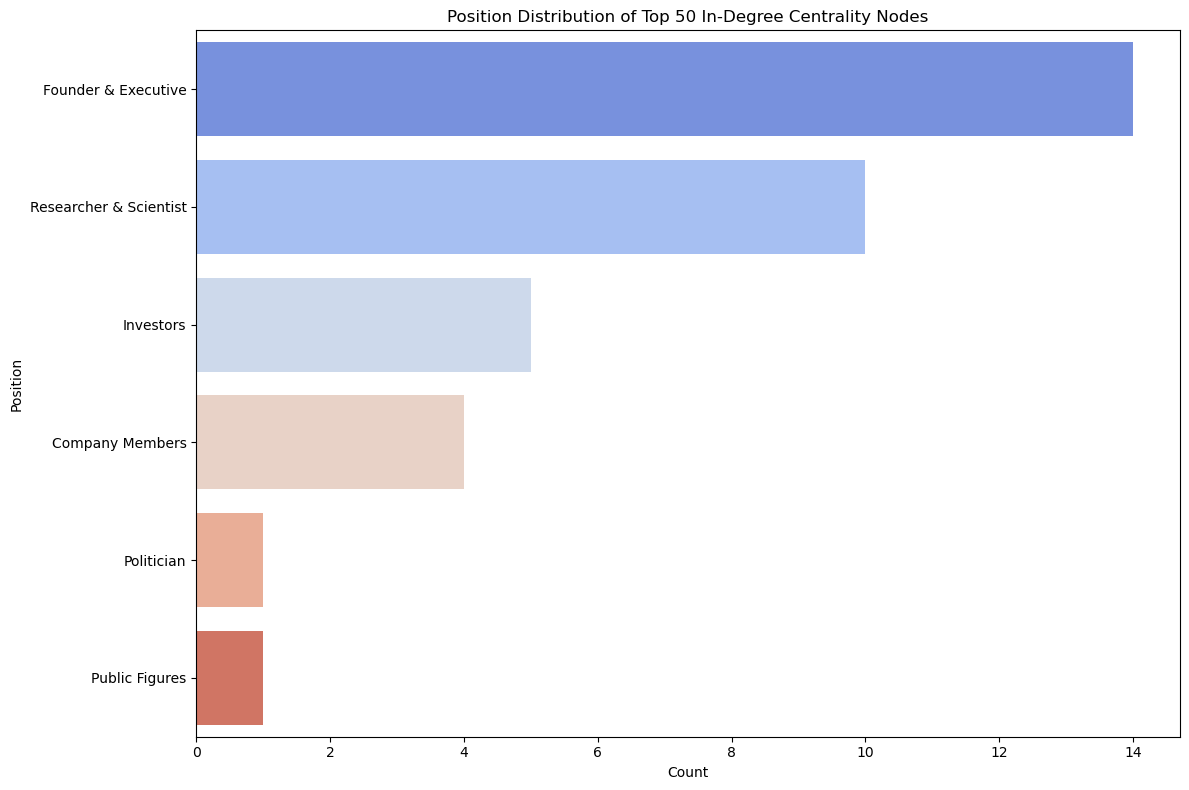

In [109]:
position_cat = top50_data_nonKOL['position_categorized'].value_counts()  

plt.figure(figsize=(12, 8))
sns.barplot(x=position_cat.values, y=position_cat.index, palette='coolwarm')
plt.title('Position Distribution of Top 50 In-Degree Centrality Nodes')
plt.xlabel('Count')
plt.ylabel('Position')
save_fig('position_distribution')
plt.show()

Saving figure location_distribution


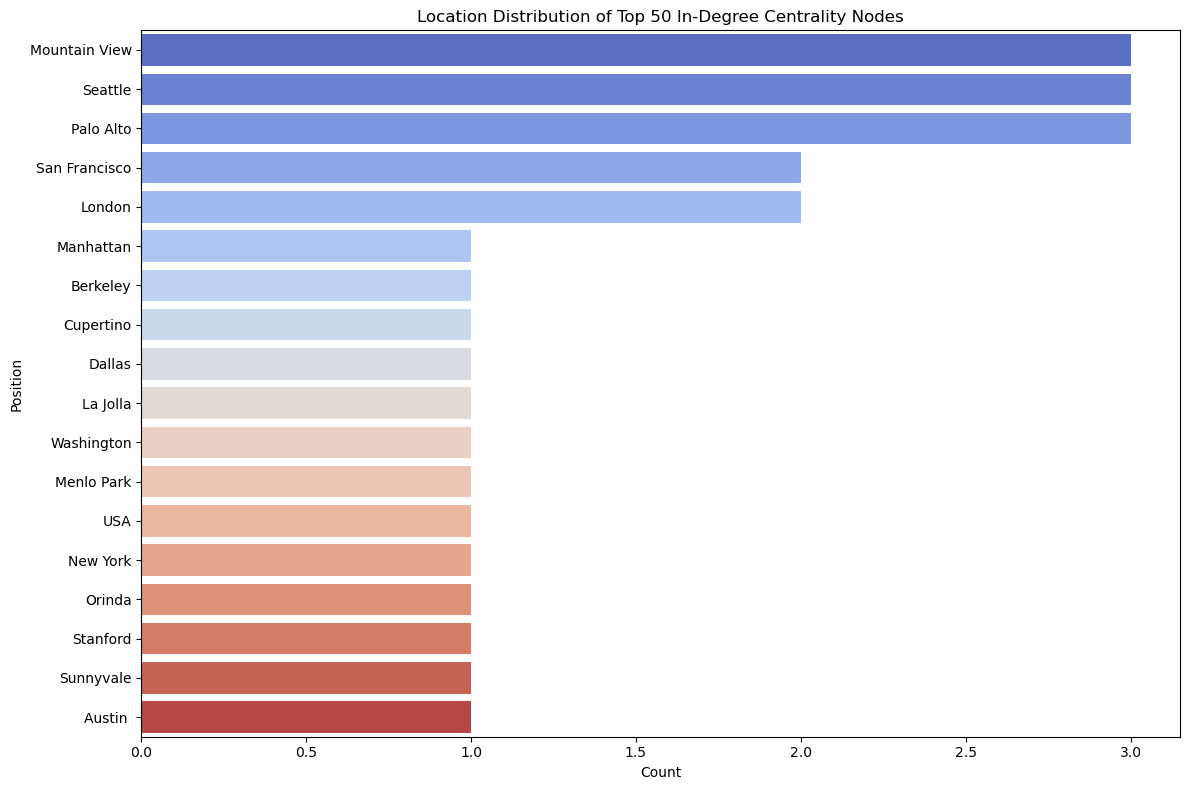

In [110]:
location_cat = top50_data_nonKOL['location_cleansed'].value_counts()  

plt.figure(figsize=(12, 8))
sns.barplot(x=location_cat.values, y=location_cat.index, palette='coolwarm')
plt.title('Location Distribution of Top 50 In-Degree Centrality Nodes')
plt.xlabel('Count')
plt.ylabel('Position')
save_fig('location_distribution')
plt.show()

### Homophily

In [13]:
data.columns

Index(['profileUrl', 'screenName_fo', 'userId_fo', 'name_fo', 'imgUrl_fo',
       'bio_fo', 'website_fo', 'location', 'location_cleansed', 'createdAt_fo',
       'followersCount_fo', 'friendsCount_fo', 'tweetsCount_fo',
       'certified_fo', 'following_fo', 'followedBy_fo', 'timestamp_fo',
       'row_id', 'if personal account', 'Position', 'Organization',
       'ai_related', 'Frequency', 'Include?', 'position_categorized',
       'highest_level_org', 'screenName_kol', 'userId_kol', 'name_kol',
       'imgUrl_kol', 'bio_kol', 'website_kol', 'location_kol', 'createdAt_kol',
       'followersCount_kol', 'friendsCount_kol', 'tweetsCount_kol',
       'certified_kol'],
      dtype='object')

In [119]:
# position_data = data_cleaned[data_cleaned['position_categorized'] == 'Researcher & Scientist']
position_data = data_cleaned[['name_kol', 'name_fo', 'position_categorized']].reset_index(drop = True)
position_data


name_kol             name_fo    position_categorized
0           Elon Musk   Wonder of Science                     NaN
1           Elon Musk  Wall Street Silver                     NaN
2           Elon Musk  Nature is Amazing                      NaN
3          Yann LeCun  Lucas Beyer (bl16)  Researcher & Scientist
4     Andrej Karpathy  Lucas Beyer (bl16)  Researcher & Scientist
...               ...                 ...                     ...
3636        Andrew Ng              OpenAI                     NaN
3637        Andrew Ng          Midjourney                     NaN
3638        Andrew Ng   OpenAI Developers                     NaN
3639        Andrew Ng           steve hsu     Founder & Executive
3640        Andrew Ng    Talking Machines                     NaN

[3641 rows x 3 columns]

In [120]:
position_data['position_categorized'].value_counts()

position_categorized
Researcher & Scientist    922
Founder & Executive       844
Company Members           368
Investors                 275
Public Figures            163
Content Creators          161
Politician                126
Company members             3
Name: count, dtype: int64

In [123]:
position_data_sub = position_data[position_data['position_categorized'].isin(['Researcher & Scientist', 'Politician'])]
position_data_sub

name_kol                       name_fo    position_categorized
3           Yann LeCun            Lucas Beyer (bl16)  Researcher & Scientist
4      Andrej Karpathy            Lucas Beyer (bl16)  Researcher & Scientist
24          Yann LeCun                  Barack Obama              Politician
28          Sam Altman                  Barack Obama              Politician
31    Mustafa Suleyman                  Barack Obama              Politician
...                ...                           ...                     ...
3624         Andrew Ng                  Emad acc/acc  Researcher & Scientist
3626         Andrew Ng  Vice President Kamala Harris              Politician
3627         Andrew Ng               President Biden              Politician
3633         Andrew Ng       Volodymyr Zelenskyy /                Politician
3634         Andrew Ng               Yulia Navalnaya              Politician

[1048 rows x 3 columns]

In [125]:
# Create a directed graph
G4 = nx.DiGraph()

# Add nodes and edges from the DataFrame
for _, row in position_data_sub.iterrows():
    G4.add_node(row['name_fo'], type=row['position_categorized'])
    G4.add_edge(row['name_kol'], row['name_fo'])

In [126]:
from collections import defaultdict

# Count the edges that connect same categories
same_category_count = 0
total_edges = G4.number_of_edges()

# A dictionary to count occurrences of each category
category_count = defaultdict(int)

# Populate the category count dictionary
for node in G4.nodes(data=True):
    category_count[node[1]['type']] += 1

# Calculate observed proportion of same-category edges
for u, v in G4.edges():
    if G4.nodes[u]['type'] == G4.nodes[v]['type']:
        same_category_count += 1

observed_proportion = same_category_count / total_edges

# Calculate expected proportion of same-category edges
expected_proportion = sum((count / total_edges) ** 2 for count in category_count.values())

# Calculate homophily index
homophily_index = (observed_proportion - expected_proportion) / (1 - expected_proportion)

print("Homophily Index:", homophily_index)


KeyError: 'type'

require position of KOL as well
故不能看KOL之间或follwoing之间的network对比 

### Social Influence

In [129]:
G5 = nx.DiGraph()

for _, row in data_cleaned.iterrows():
    # G5.add_node(row['screenName_kol'], type='influencer')
    G5.add_node(row['name_fo'], type='following')
    G5.add_edge(row['name_kol'], row['name_fo'])
    
    G5.nodes[row['name_fo']]['followersCount'] = row['followersCount_fo']
    G5.nodes[row['name_fo']]['tweetsCount'] = row['tweetsCount_fo']
    G5.nodes[row['name_fo']]['friendsCount'] = row['friendsCount_fo']
    # G5.nodes[row['name_fo']]['certified'] = row['certified_kol']  # Verification status could also indicate influence


In [130]:
# Normalize metrics
max_followers = max(nx.get_node_attributes(G5, 'followersCount').values(), default=0)  # Adding default to handle empty cases
max_degree = max(nx.degree_centrality(G5).values(), default=0)  # Adding default to handle empty cases

for node in G5.nodes():
    followers_count = G5.nodes[node].get('followersCount', 0)  # Provide a default if missing
    followers_norm = followers_count / max_followers if max_followers > 0 else 0
    degree_norm = nx.degree_centrality(G5).get(node, 0) / max_degree if max_degree > 0 else 0
    G5.nodes[node]['influence_score'] = 0.5 * followers_norm + 0.5 * degree_norm

/Users/yanhuanhuang/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


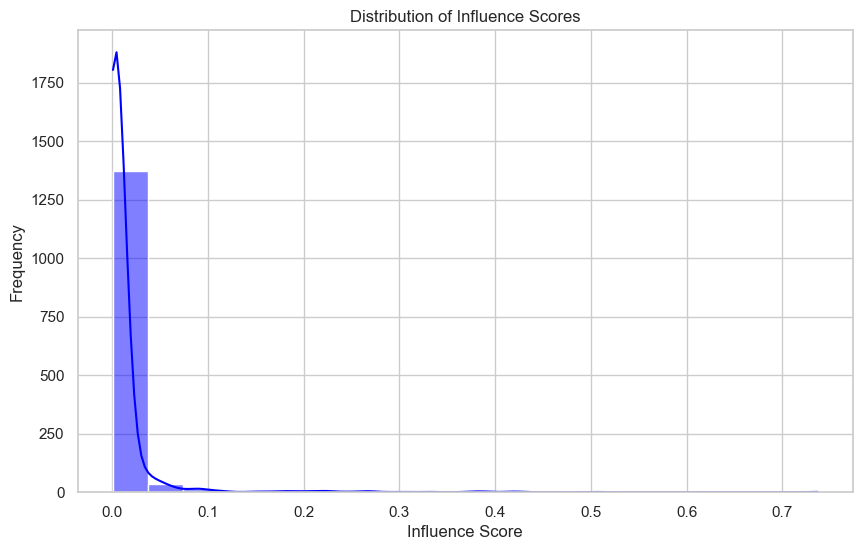

In [131]:
influence_scores = [G5.nodes[node]['influence_score'] for node in G5.nodes()]

sns.set(style="whitegrid")

# Plotting the distribution of influence scores with seaborn
plt.figure(figsize=(10, 6))  # Setting the figure size
sns.histplot(influence_scores, bins=20, kde=True, color='blue')  # KDE adds a density curve
plt.title('Distribution of Influence Scores')
plt.xlabel('Influence Score')
plt.ylabel('Frequency')
plt.show()


In [132]:
# Summary statistics
print(pd.Series(influence_scores).describe())

count    1445.000000
mean        0.011806
std         0.042246
min         0.000912
25%         0.001906
50%         0.003133
75%         0.006396
max         0.736794
dtype: float64


In [138]:
# Finding top influencers within KOL's followings
top_influencers = sorted(G5.nodes(data=True), key=lambda x: x[1].get('influence_score', 0), reverse=True)[:200]

top_influencers_in_followings = pd.DataFrame({
    'Node': [node for node, data in top_influencers],
    'Influence Score': [data['influence_score'] for node, data in top_influencers],
    'Followers Count': [data.get('followersCount', 'N/A') for node, data in top_influencers]
})

# Exclude KOL
top_influencers_in_followings = top_influencers_in_followings[~top_influencers_in_followings['Node'].isin(KOL_list)].reset_index(drop = True)
top_influencers_in_followings

Node  Influence Score  Followers Count
0       Barack Obama         0.373198      131913149.0
1            Rihanna         0.300350      107949316.0
2      Narendra Modi         0.270136       97057010.0
3       Taylor Swift         0.267075       95296828.0
4    Donald J. Trump         0.245971       87360322.0
..               ...              ...              ...
180  Richard Dawkins         0.011093        3013917.0
181  The Babylon Bee         0.011002        3637781.0
182       John Kerry         0.010943        3288199.0
183  The Independent         0.010909        3604478.0
184     Vinod Khosla         0.010854         629483.0

[185 rows x 3 columns]

In [141]:
top_influencers_full = data_cleaned[data_cleaned['name_fo'].isin(top_influencers_in_followings['Node'])].drop_duplicates('name_fo').reset_index(drop = True)
top_influencers_full

profileUrl    screenName_fo     userId_fo  \
0      https://twitter.com/redbullracing    redbullracing  2.260878e+08   
1       https://twitter.com/newscientist     newscientist  1.965883e+07   
2           https://twitter.com/JohnCena         JohnCena  1.416646e+08   
3    https://twitter.com/ScienceMagazine  ScienceMagazine  3.237283e+07   
4        https://twitter.com/BarackObama      BarackObama  8.132860e+05   
..                                   ...              ...           ...   
180       https://twitter.com/HarvardBiz       HarvardBiz  1.480027e+07   
181           https://twitter.com/FLOTUS           FLOTUS  1.349155e+18   
182      https://twitter.com/ZelenskyyUa      ZelenskyyUa  1.120634e+18   
183   https://twitter.com/AnnaKendrick47   AnnaKendrick47  5.994940e+07   
184               https://twitter.com/VP               VP  8.036942e+17   

                          name_fo  \
0          Oracle Red Bull Racing   
1                   New Scientist   
2                       John Cena   
3                Science Magazine   
4                    Barack Obama   
..                            ...   
180       Harvard Business Review   
181                    Jill Biden   
182       Volodymyr Zelenskyy /     
183                 Anna Kendrick   
184  Vice President Kamala Harris   

                                             imgUrl_fo  \
0    https://pbs.twimg.com/profile_images/177574120...   
1    https://pbs.twimg.com/profile_images/960860144...   
2    https://pbs.twimg.com/profile_images/158973093...   
3    https://pbs.twimg.com/profile_images/100191823...   
4    https://pbs.twimg.com/profile_images/132964752...   
..                                                 ...   
180  https://pbs.twimg.com/profile_images/124977896...   
181  https://pbs.twimg.com/profile_images/134986869...   
182  https://pbs.twimg.com/profile_images/158555004...   
183  https://pbs.twimg.com/profile_images/481264998...   
184  https://pbs.twimg.com/profile_images/138065778...   

                                                bio_fo  \
0                   Currently in Japan  #GivesYouWings   
1    The best place to find out whats new in scienc...   
2    A forum of thoughts and perspectives designed ...   
3    The world's leading outlet for cutting-edge re...   
4                    Dad, husband, President, citizen.   
..                                                 ...   
180  The best ideas in business and management to h...   
181  First Lady of the United States Jill Biden. Co...   
182                           President of Ukraine /     
183                                      kind of a lot   
184  Vice President of the United States. Wife to t...   

                        website_fo                        location  \
0          onein.bio/redbullracing                       Worldwide   
1                 newscientist.com                       Worldwide   
2             makeawish.org/donate                West Newbury, MA   
3                      science.org  Washington, DC & Cambridge, UK   
4             barackobamabooks.com                  Washington, DC   
..                             ...                             ...   
180                        hbr.org                             NaN   
181  whitehouse.gov/cancermoonshot                             NaN   
182               president.gov.ua                             NaN   
183                            NaN                             NaN   
184                 whitehouse.gov                             NaN   

    location_cleansed                    createdAt_fo  ...        name_kol  \
0                 NaN  Mon Dec 13 08:12:04 +0000 2010  ...       Elon Musk   
1                 NaN  Wed Jan 28 16:05:49 +0000 2009  ...       Elon Musk   
2        West Newbury  Sat May 08 17:43:50 +0000 2010  ...      Sam Altman   
3          Washington  Fri Apr 17 11:37:12 +0000 2009  ...  Ian Goodfellow   
4          Washington  Mon Mar 05 22:08:25 +0000 2007  ... 

In [142]:
top_influencers_person = top_influencers_full[top_influencers_full['if personal account'] == 'Y']
top_influencers_person

profileUrl   screenName_fo     userId_fo  \
2          https://twitter.com/JohnCena        JohnCena  1.416646e+08   
4       https://twitter.com/BarackObama     BarackObama  8.132860e+05   
5      https://twitter.com/KamalaHarris    KamalaHarris  3.035499e+07   
6          https://twitter.com/JoeBiden        JoeBiden  9.390910e+05   
12    https://twitter.com/MichelleObama   MichelleObama  4.094866e+08   
..                                  ...             ...           ...   
175     https://twitter.com/StephenKing     StephenKing  2.233154e+09   
181          https://twitter.com/FLOTUS          FLOTUS  1.349155e+18   
182     https://twitter.com/ZelenskyyUa     ZelenskyyUa  1.120634e+18   
183  https://twitter.com/AnnaKendrick47  AnnaKendrick47  5.994940e+07   
184              https://twitter.com/VP              VP  8.036942e+17   

                          name_fo  \
2                       John Cena   
4                    Barack Obama   
5                   Kamala Harris   
6                       Joe Biden   
12                 Michelle Obama   
..                            ...   
175                  Stephen King   
181                    Jill Biden   
182       Volodymyr Zelenskyy /     
183                 Anna Kendrick   
184  Vice President Kamala Harris   

                                             imgUrl_fo  \
2    https://pbs.twimg.com/profile_images/158973093...   
4    https://pbs.twimg.com/profile_images/132964752...   
5    https://pbs.twimg.com/profile_images/159224131...   
6    https://pbs.twimg.com/profile_images/130876966...   
12   https://pbs.twimg.com/profile_images/176283627...   
..                                                 ...   
175  https://pbs.twimg.com/profile_images/378800000...   
181  https://pbs.twimg.com/profile_images/134986869...   
182  https://pbs.twimg.com/profile_images/158555004...   
183  https://pbs.twimg.com/profile_images/481264998...   
184  https://pbs.twimg.com/profile_images/138065778...   

                                                bio_fo  \
2    A forum of thoughts and perspectives designed ...   
4                    Dad, husband, President, citizen.   
5    Fighting for the people. Wife, Momala, Auntie....   
6    Husband to @DrBiden, proud father and grandfat...   
12   Girl from the South Side and former First Lady...   
..                                                 ...   
175                                             Author   
181  First Lady of the United States Jill Biden. Co...   
182                           President of Ukraine /     
183                                      kind of a lot   
184  Vice President of the United States. Wife to t...   

                        website_fo          location location_cleansed  \
2             makeawish.org/donate  West Newbury, MA      West Newbury   
4             barackobamabooks.com    Washington, DC        Washington   
5                     joebiden.com    Washington, DC        Washington   
6                     joebiden.com    Washington, DC        Washington   
12          michelleobamabooks.com    Washington, DC        Washington   
..                             ...               ...               ...   
175                stephenking.com               NaN               NaN   
181  whitehouse.gov/cancermoonshot               NaN               NaN   
182               president.gov.ua               NaN               NaN   
183                            NaN               NaN               NaN   
184                 whitehouse.gov               NaN               NaN   

                       createdAt_fo  ...    name_kol  \
2    Sat May 08 17:43:50 +0000 2010  ...  Sam Altman   
4    Mon Mar 05 22:08:25 +0000 2007  ...  Yann LeCun   
5    Sat Apr 11 00:42:07 +0000 2009  ...  Kai-Fu Lee   
6    Sun Mar 11 17:51:24 +0000 2007  ...  Kai-Fu Lee   
12   Thu Nov 10 20:13:01 +0000 2011  ...   Andrew Ng   
..                              ...  ...         ...   
175  Fri Dec 06 15:26:35 +0000 2

Saving figure position_distribution2


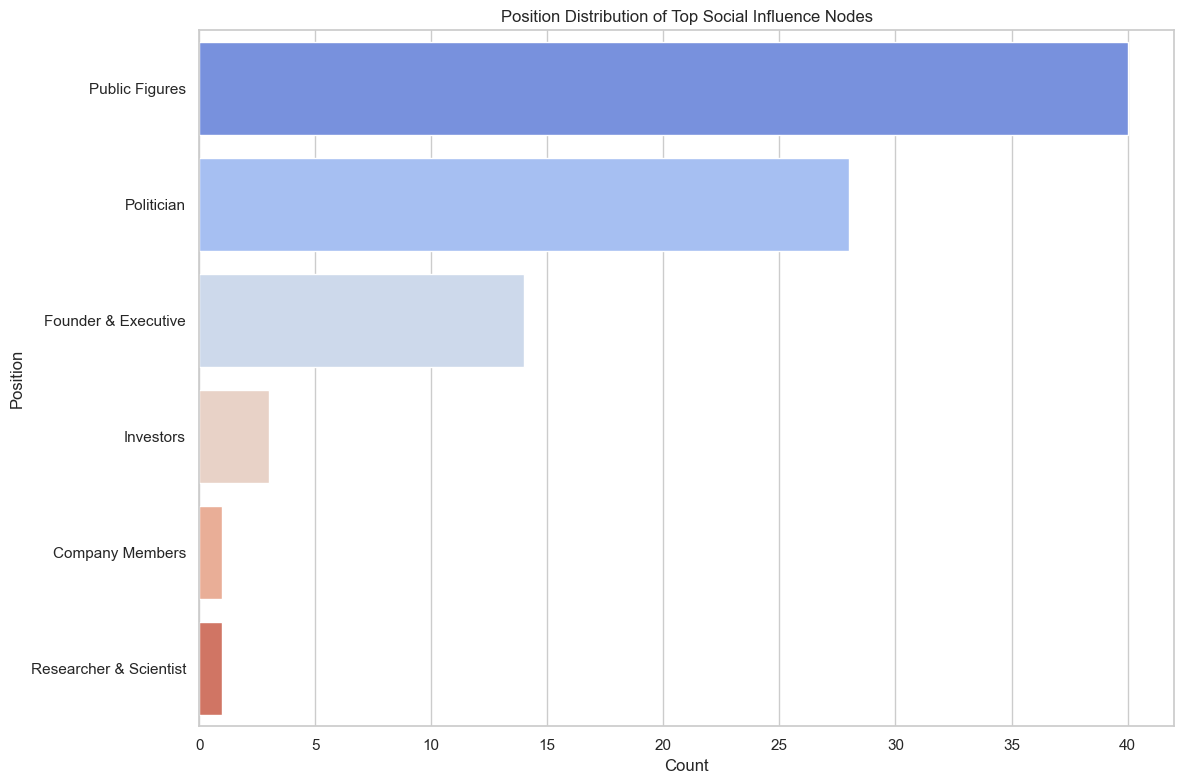

In [144]:
position_cat2 = top_influencers_person['position_categorized'].value_counts()  

plt.figure(figsize=(12, 8))
sns.barplot(x=position_cat2.values, y=position_cat2.index, palette='coolwarm')
plt.title('Position Distribution of Top Social Influence Nodes')
plt.xlabel('Count')
plt.ylabel('Position')
save_fig('position_distribution2')
plt.show()

Saving figure location_distribution2


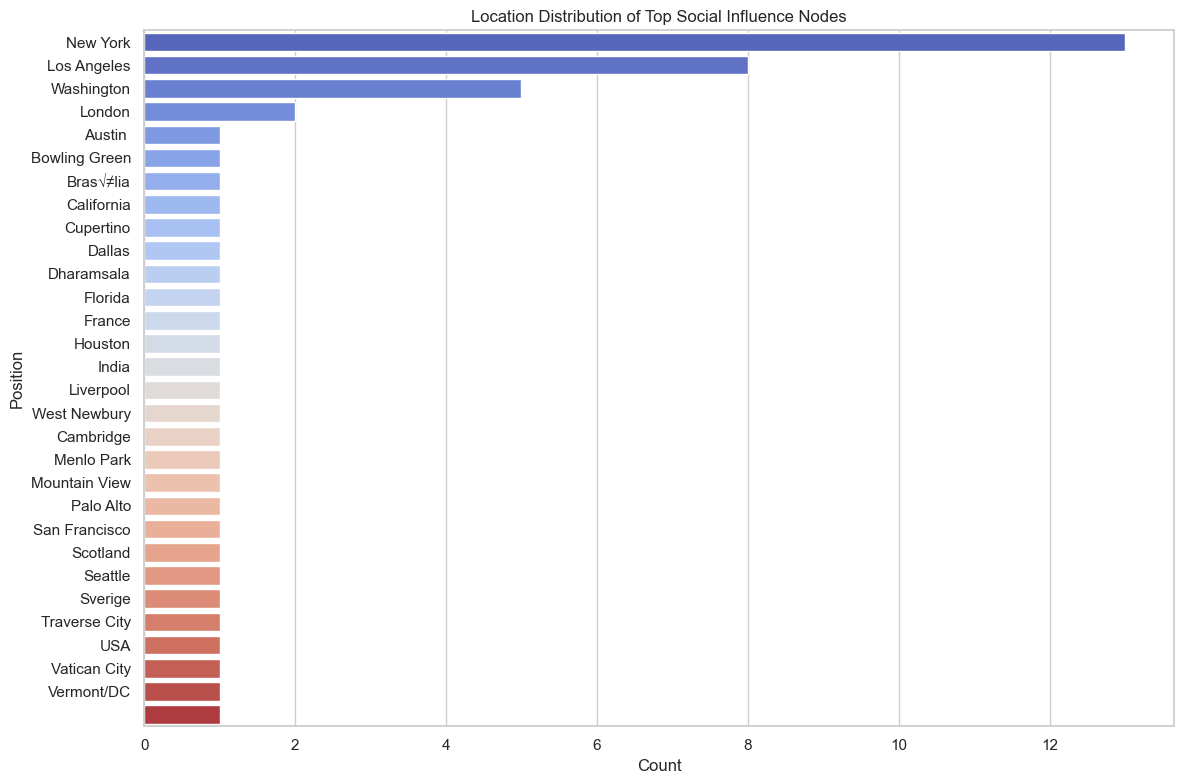

In [143]:
location_cat2 = top_influencers_person['location_cleansed'].value_counts()  

plt.figure(figsize=(12, 8))
sns.barplot(x=location_cat2.values, y=location_cat2.index, palette='coolwarm')
plt.title('Location Distribution of Top Social Influence Nodes')
plt.xlabel('Count')
plt.ylabel('Position')
save_fig('location_distribution2')
plt.show()